<a href="https://colab.research.google.com/github/Mayalbogami/project/blob/main/yolo_v8_GP_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import numpy as np
import pandas as pd
import os
from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns
#from sklearn.model_selection import train_test_split
#from ultralytics import YOLO
import zipfile
import requests
import imgaug.augmenters as iaa
import glob
import random

## Upload dataset

In [ ]:
!git clone https://github.com/progHYA/Rasad.git

fatal: destination path 'Rasad' already exists and is not an empty directory.


### Install dependcies

In [ ]:
!pip install ultralytics -q

#Nano Model


In [ ]:
#trail 1
!yolo task=detect mode=train model=yolov8n.pt data= '/content/Rasad/Hajj dataset yolo v8/data.yaml' epochs=100 imgsz=245 plots=True

Ultralytics YOLOv8.1.15 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/Rasad/Hajj dataset yolo v8/data.yaml, epochs=100, time=None, patience=50, batch=16, imgsz=245, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, s

In [ ]:
!ls runs/detect/train/

args.yaml					    labels.jpg	      train_batch1.jpg
events.out.tfevents.1708272450.1a35fdfa1444.1222.0  results.csv       train_batch2.jpg
labels_correlogram.jpg				    train_batch0.jpg  weights


In [ ]:
import os
from IPython.display import display, Image
from IPython import display
display.clear_output()
!yolo mode=checks

Traceback (most recent call last):
  File "/usr/local/bin/yolo", line 8, in <module>
    sys.exit(entrypoint())
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/cfg/__init__.py", line 509, in entrypoint
    raise ValueError(f"Invalid 'mode={mode}'. Valid modes are {MODES}.\n{CLI_HELP_MSG}")
ValueError: Invalid 'mode=<module 'ultralytics.utils.checks' from '/usr/local/lib/python3.10/dist-packages/ultralytics/utils/checks.py'>'. Valid modes are ('train', 'val', 'predict', 'export', 'track', 'benchmark').

    Arguments received: ['yolo', 'mode=checks']. Ultralytics 'yolo' commands use the following syntax:

        yolo TASK MODE ARGS

        Where   TASK (optional) is one of ('detect', 'segment', 'classify', 'pose', 'obb')
                MODE (required) is one of ('train', 'val', 'predict', 'export', 'track', 'benchmark')
                ARGS (optional) are any number of custom 'arg=value' pairs like 'imgsz=320' that override defaults.
                    See all ARGS at ht

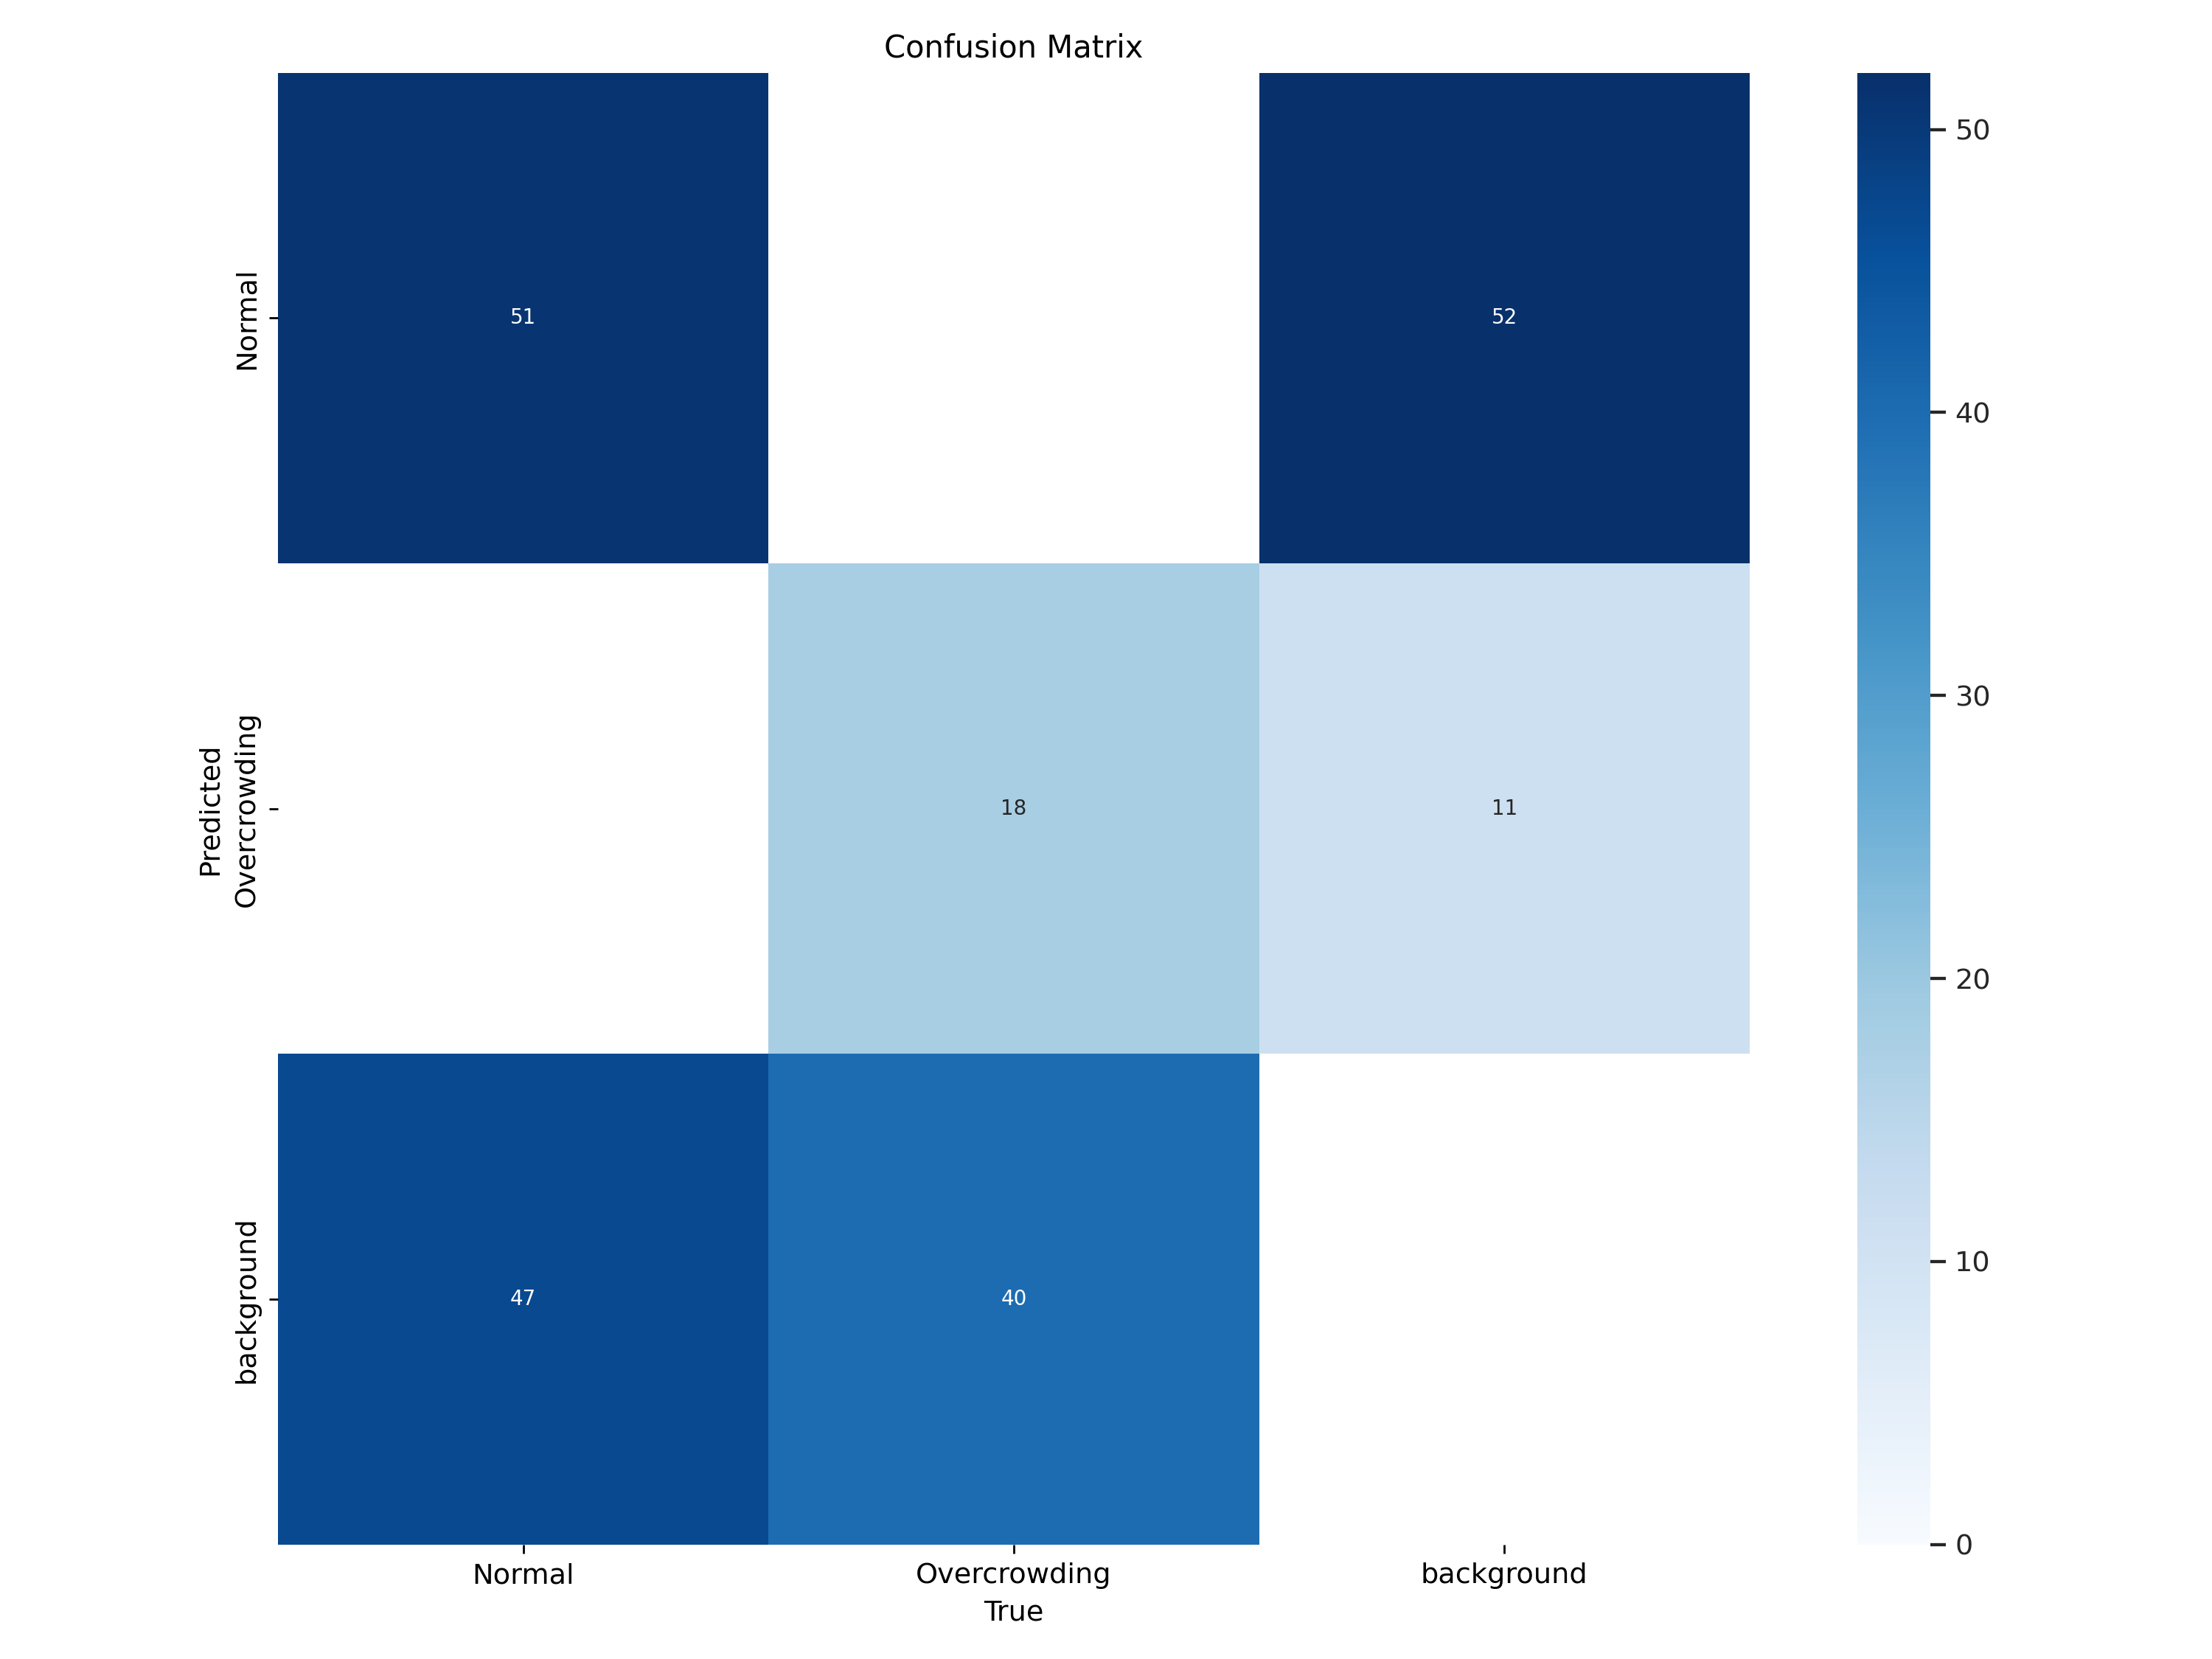

In [ ]:
Image(filename='/content/runs/detect/train3/confusion_matrix.png', width=600)

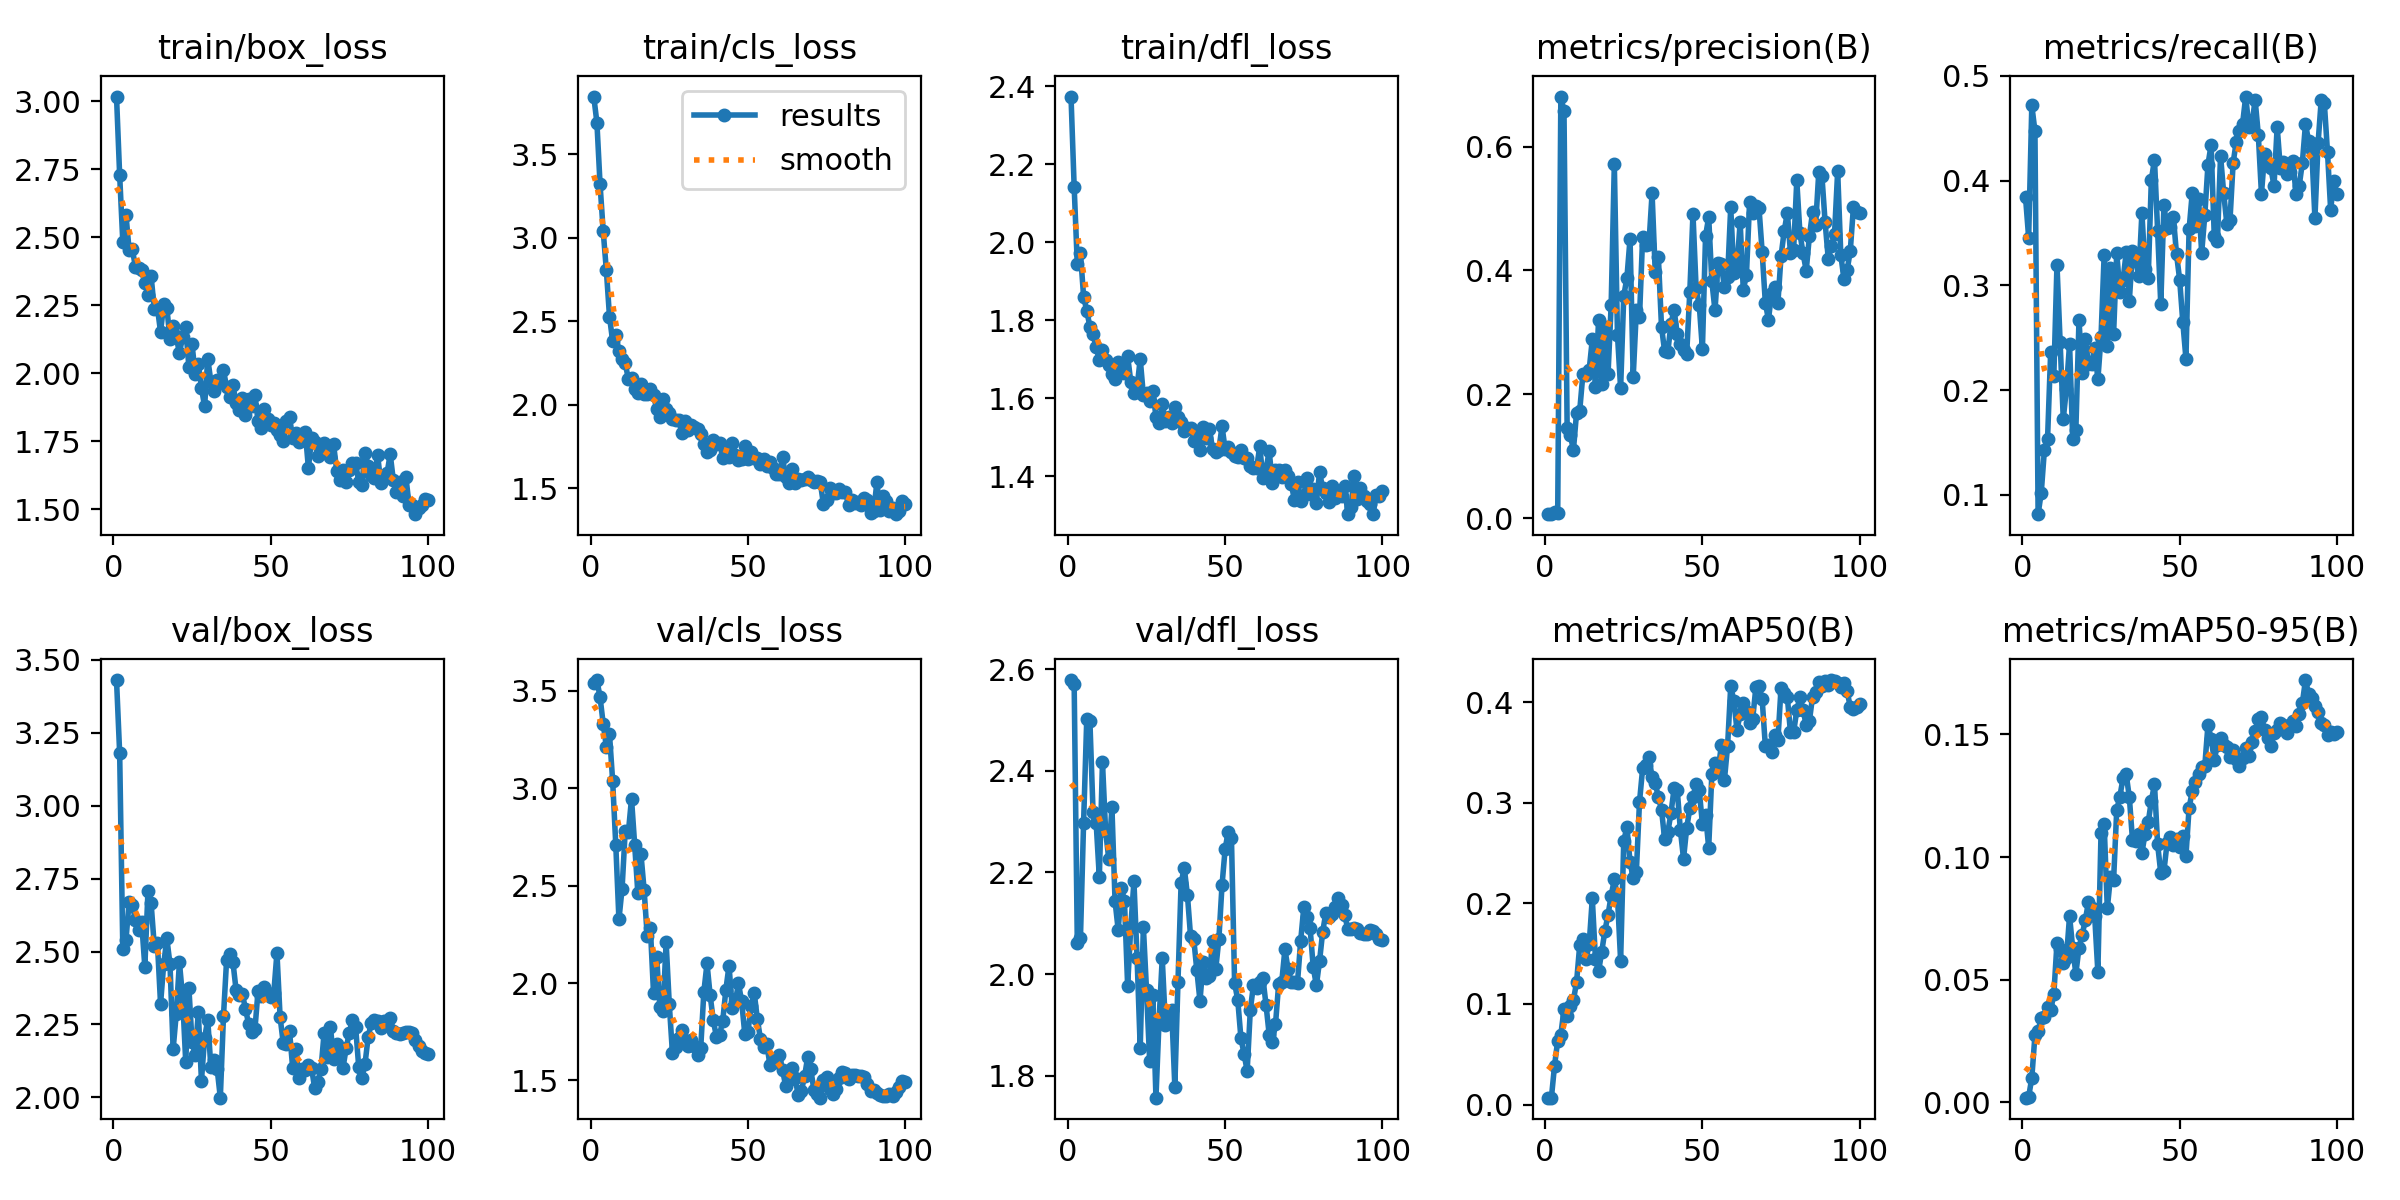

In [ ]:
Image(filename='/content/runs/detect/train3/results.png', width=600)

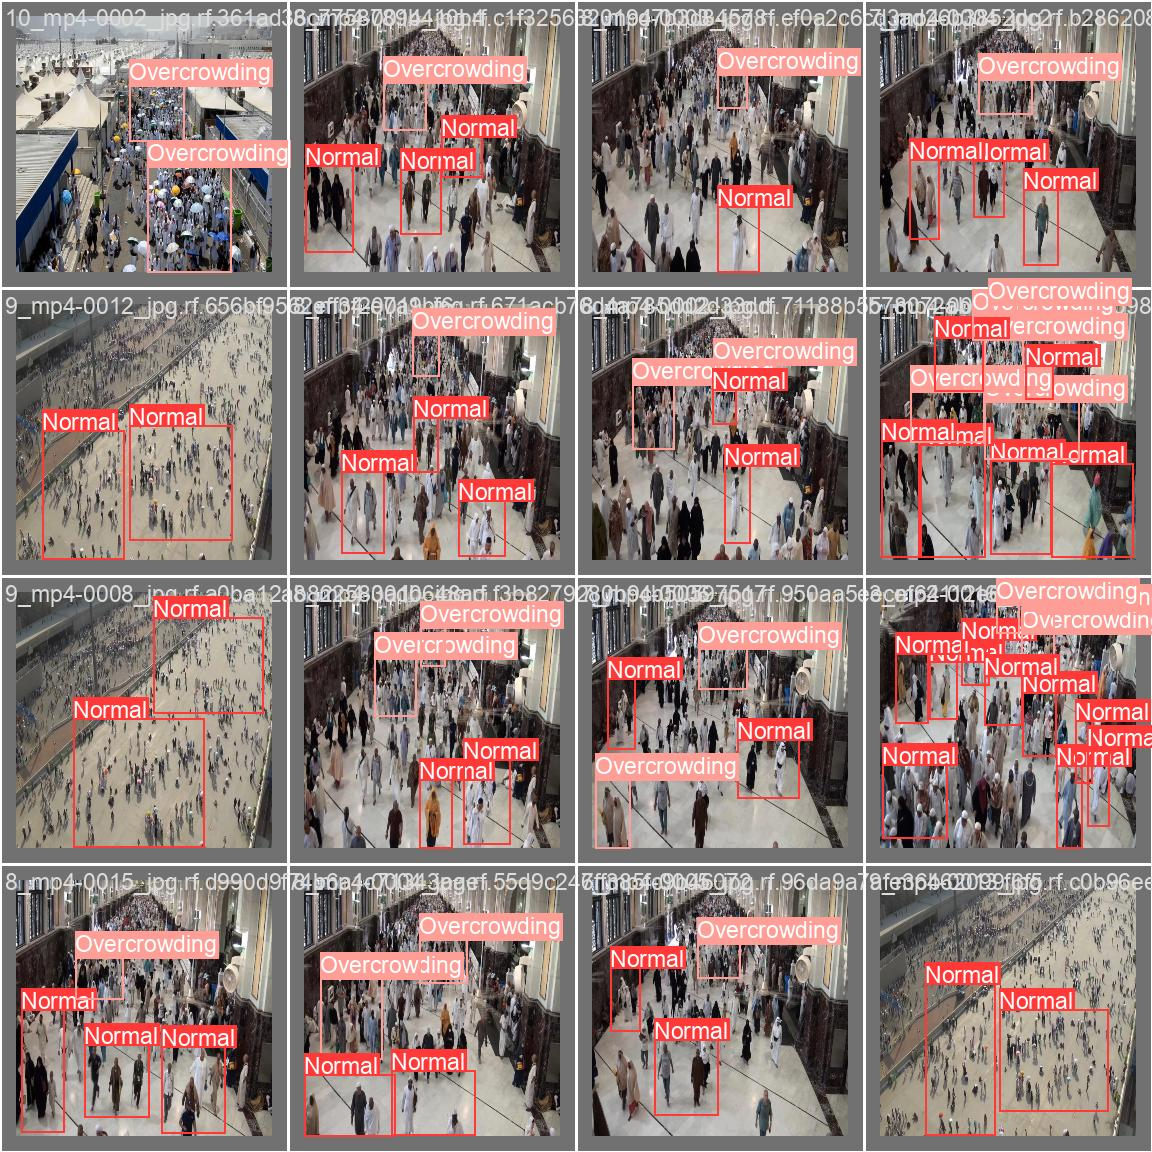

In [ ]:
Image(filename='/content/runs/detect/train3/val_batch0_labels.jpg', width=600)

In [ ]:
#Valdiation trail 1
!yolo task=detect mode=val model='/content/runs/detect/train3/weights/best.pt' data='/content/Rasad/Hajj dataset yolo v8/data.yaml'

Ultralytics YOLOv8.1.15 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3006038 parameters, 0 gradients, 8.1 GFLOPs
val: Scanning /content/Rasad/Hajj dataset yolo v8/valid/labels.cache... 33 images, 0 backgrounds, 0 corrupt: 100% 33/33 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 3/3 [00:03<00:00,  1.01s/it]
                   all         33        156      0.425      0.465      0.418      0.172
                Normal         33         98      0.362      0.551      0.463      0.216
          Overcrowding         33         58      0.488      0.379      0.373      0.128
Speed: 0.1ms preprocess, 23.3ms inference, 0.0ms loss, 20.8ms postprocess per image
Results saved to runs/detect/val8
💡 Learn more at https://docs.ultralytics.com/modes/val


In [ ]:
#prdiction trail 1
!yolo task=detect mode=predict model='/content/runs/detect/train3/weights/best.pt' conf=0.25 source='/content/Rasad/Hajj dataset yolo v8/test/images'

Ultralytics YOLOv8.1.15 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3006038 parameters, 0 gradients, 8.1 GFLOPs

image 1/16 /content/Rasad/Hajj dataset yolo v8/test/images/10_mp4-0000_jpg.rf.87226d98d10f7a76a2ea5b19b3575676.jpg: 256x256 3 Overcrowdings, 9.4ms
image 2/16 /content/Rasad/Hajj dataset yolo v8/test/images/10_mp4-0003_jpg.rf.647bdf9189a18854b078c02a51e3e764.jpg: 256x256 2 Overcrowdings, 6.9ms
image 3/16 /content/Rasad/Hajj dataset yolo v8/test/images/11_mp4-0011_jpg.rf.8c8ac0fc0309cdf67637f2f762a248bd.jpg: 256x256 6 Normals, 1 Overcrowding, 5.9ms
image 4/16 /content/Rasad/Hajj dataset yolo v8/test/images/11_mp4-0015_jpg.rf.689577e901ad8b400fca35914c1982ce.jpg: 256x256 4 Normals, 1 Overcrowding, 7.1ms
image 5/16 /content/Rasad/Hajj dataset yolo v8/test/images/12_mp4-0002_jpg.rf.abd812b6caed384b60e2ce3bb51b40ae.jpg: 256x256 3 Overcrowdings, 5.7ms
image 6/16 /content/Rasad/Hajj dataset yolo v8/test/images/12_mp4-0003_jpg.rf.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# save to drive to get folders + model
import shutil
from google.colab import drive

# Mount your Google Drive
drive.mount('/content/drive',force_remount=True)

# Specify the path to the folder to save
folder_path = '/content/runs'

# Specify the path to the destination folder in Google Drive
destination_path = '/content/drive/MyDrive/Colab Notebooks/yolo v8 results'

# Copy the entire folder to your Google Drive
#shutil.copytree(folder_path, destination_path)

Mounted at /content/drive


In [ ]:
#accuracy trail 1
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import pickle

iris = load_iris()
model = GaussianNB()

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1)
model_f = model.fit(X_train, y_train)

print("Model score: ", model.score(X_train, y_train))
print("Test Accuracy: ", model.score(X_test, y_test))

pickle.dump(model_f, open("model_gb.pkl", "wb"))

Model score:  0.9555555555555556
Test Accuracy:  1.0


## **YOLOv8 Medium model**

In [ ]:
#trail 2
!yolo task=detect mode=train model=yolov8m.pt data= '/content/Rasad/Hajj dataset yolo v8/data.yaml' epochs=100 imgsz=245 plots=True

100% 49.7M/49.7M [00:00<00:00, 199MB/s]
Ultralytics YOLOv8.1.15 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/Rasad/Hajj dataset yolo v8/data.yaml, epochs=100, time=None, patience=50, batch=16, imgsz=245, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train4, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=Fal

In [ ]:
!ls runs/detect/train/

args.yaml					    labels.jpg	      train_batch1.jpg
events.out.tfevents.1708272450.1a35fdfa1444.1222.0  results.csv       train_batch2.jpg
labels_correlogram.jpg				    train_batch0.jpg  weights


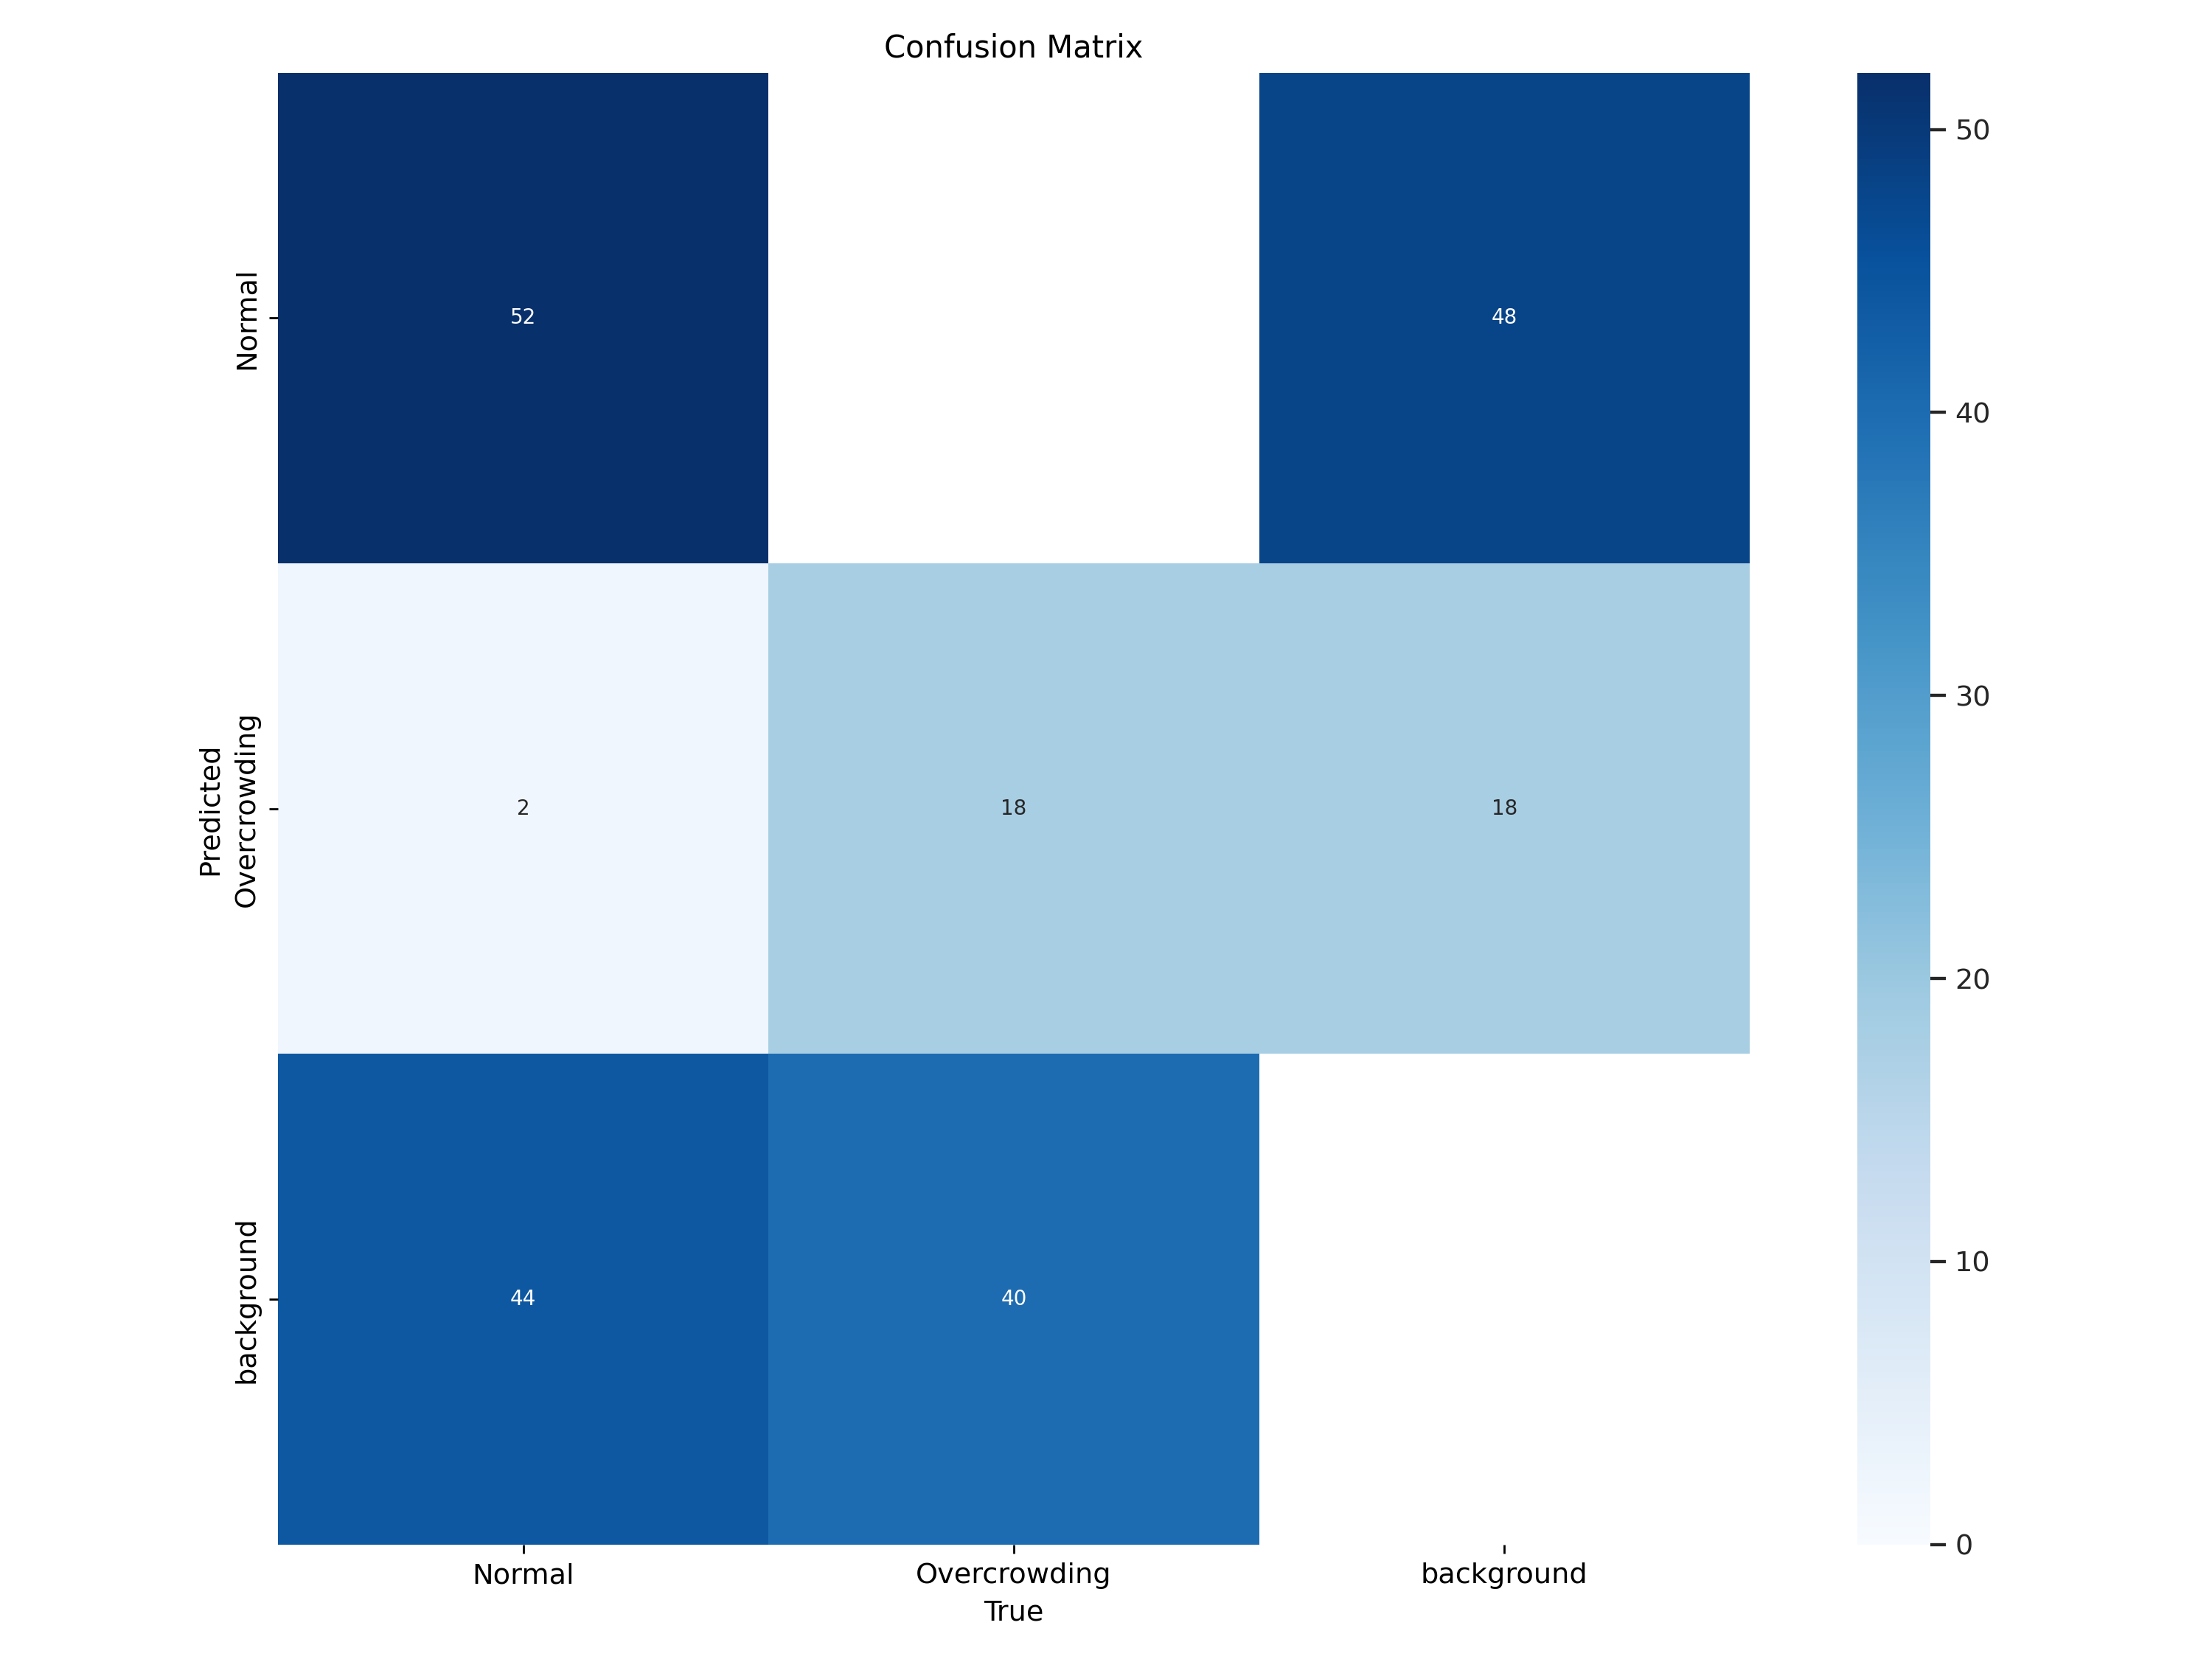

In [ ]:
Image(filename='/content/runs/detect/train4/confusion_matrix.png', width=600)

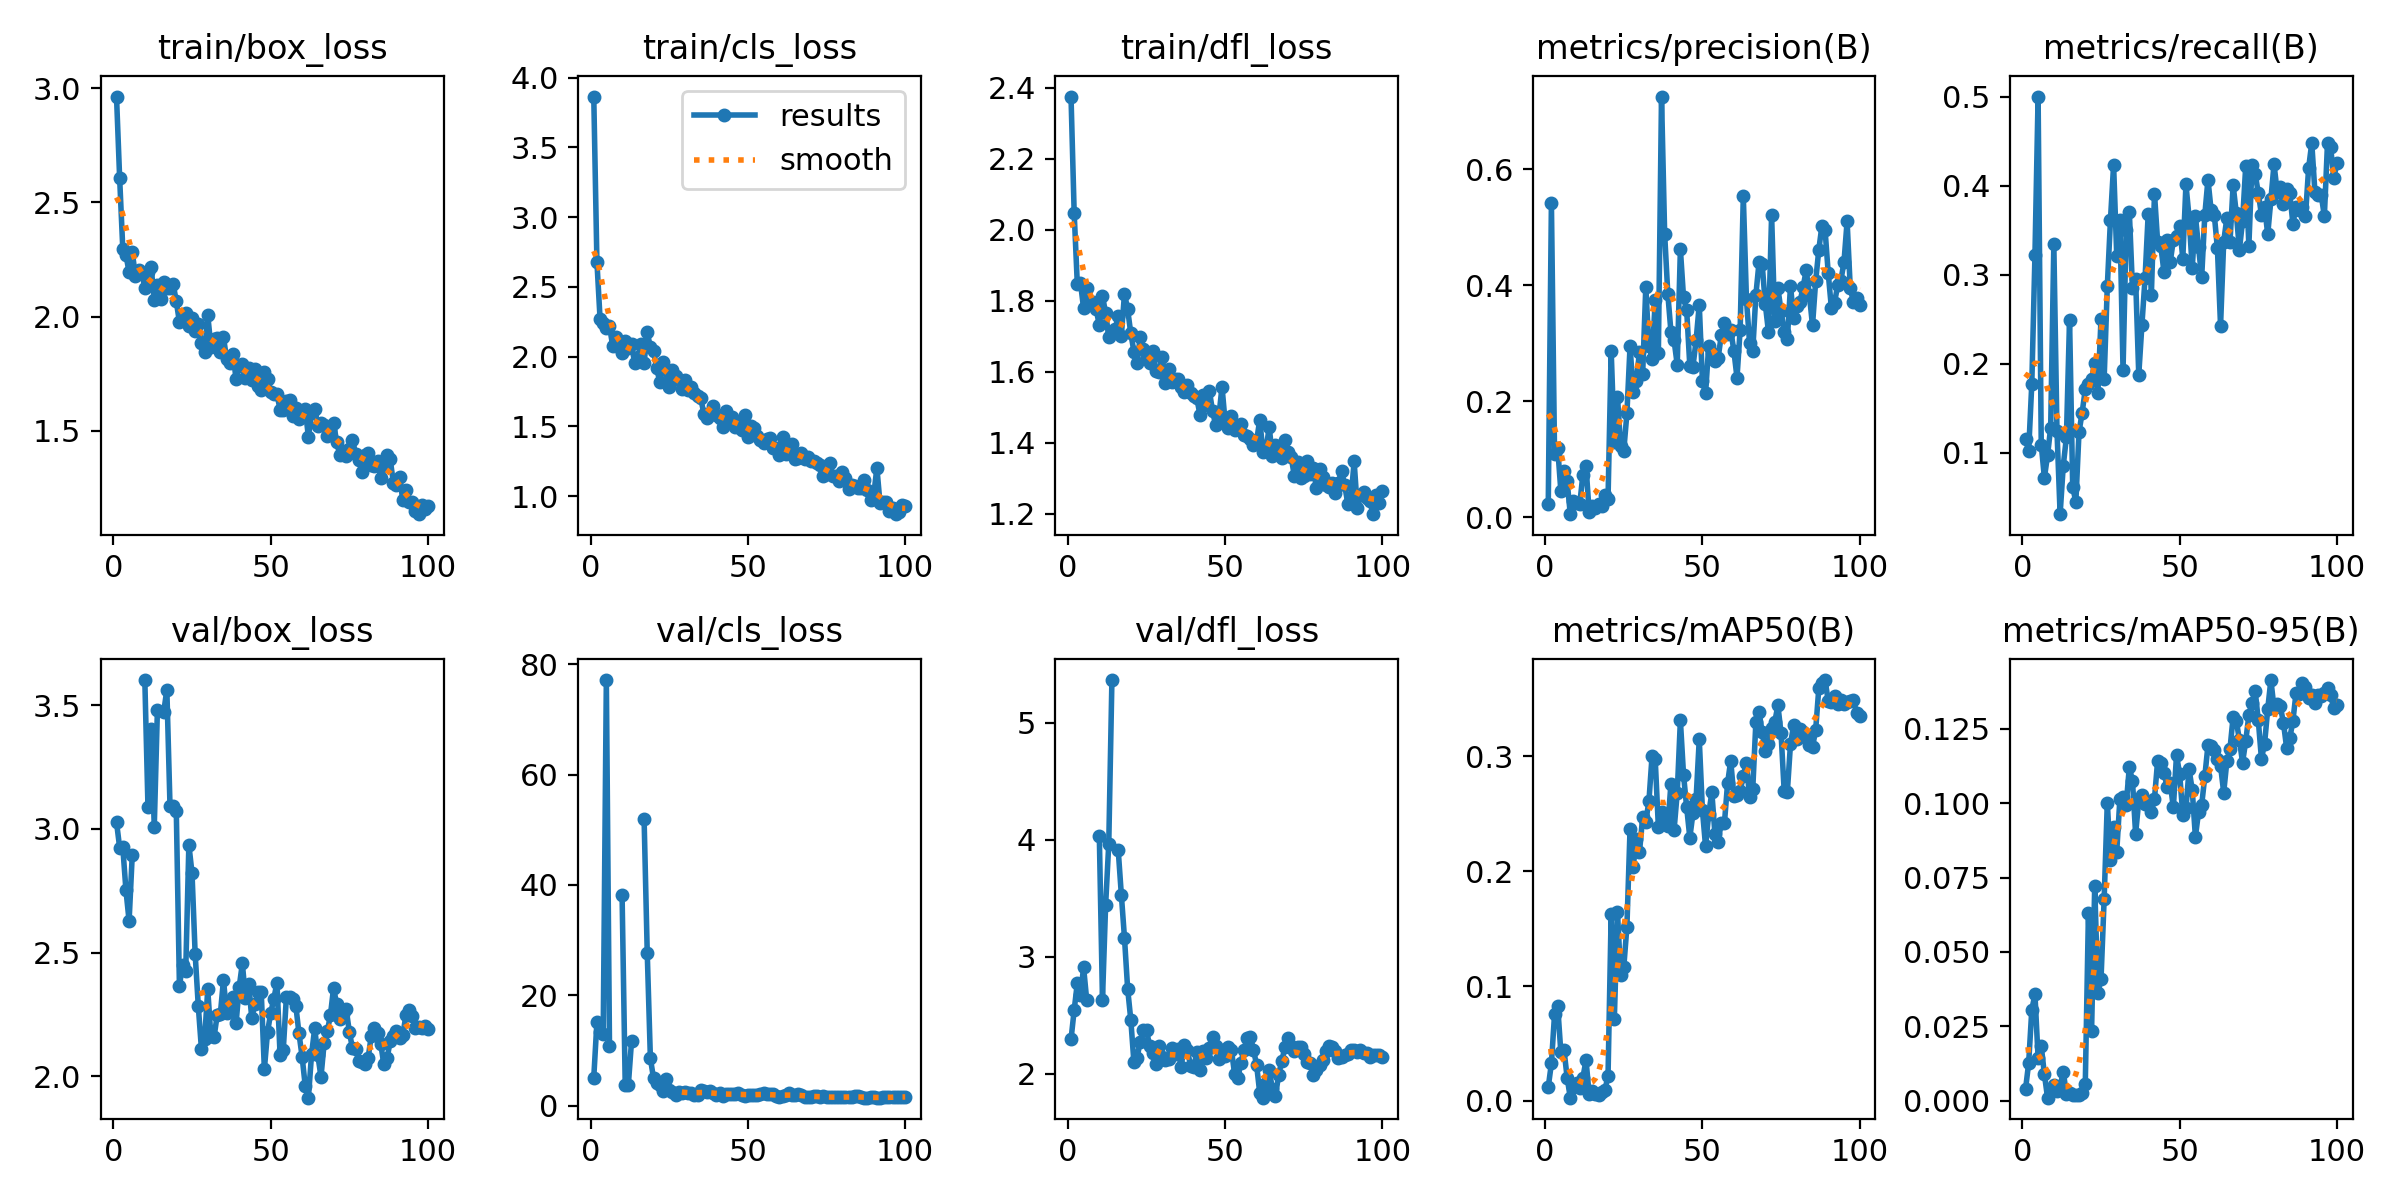

In [ ]:
Image(filename='/content/runs/detect/train4/results.png', width=600)

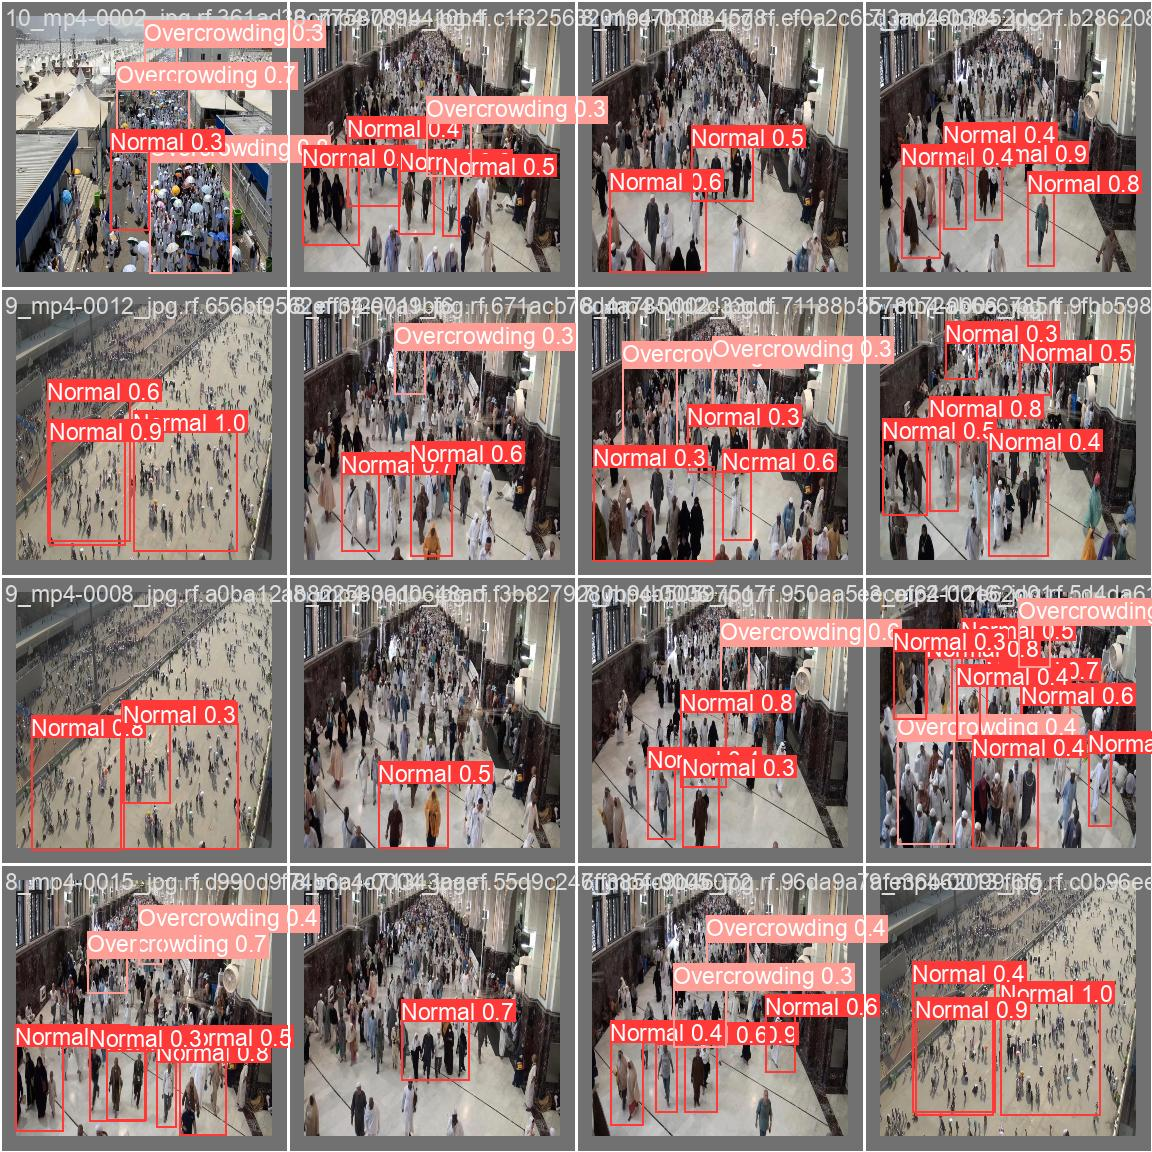

In [ ]:
Image(filename='/content/runs/detect/train4/val_batch0_pred.jpg', width=600)

In [ ]:
#Validation trail 2
!yolo task=detect mode=val model='/content/runs/detect/train4/weights/best.pt' data='/content/Rasad/Hajj dataset yolo v8/data.yaml'

Ultralytics YOLOv8.1.15 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840918 parameters, 0 gradients, 78.7 GFLOPs
val: Scanning /content/Rasad/Hajj dataset yolo v8/valid/labels.cache... 33 images, 0 backgrounds, 0 corrupt: 100% 33/33 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 3/3 [00:03<00:00,  1.04s/it]
                   all         33        156      0.495      0.376      0.366       0.14
                Normal         33         98      0.469      0.459      0.441      0.197
          Overcrowding         33         58      0.521      0.293      0.292     0.0835
Speed: 1.2ms preprocess, 32.4ms inference, 0.0ms loss, 19.9ms postprocess per image
Results saved to runs/detect/val10
💡 Learn more at https://docs.ultralytics.com/modes/val


In [ ]:
#prediction trail 2
!yolo task=detect mode=predict model='/content/runs/detect/train4/weights/best.pt' conf=0.25 source='/content/Rasad/Hajj dataset yolo v8/test/images'

Ultralytics YOLOv8.1.15 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840918 parameters, 0 gradients, 78.7 GFLOPs

image 1/16 /content/Rasad/Hajj dataset yolo v8/test/images/10_mp4-0000_jpg.rf.87226d98d10f7a76a2ea5b19b3575676.jpg: 256x256 3 Overcrowdings, 16.0ms
image 2/16 /content/Rasad/Hajj dataset yolo v8/test/images/10_mp4-0003_jpg.rf.647bdf9189a18854b078c02a51e3e764.jpg: 256x256 3 Overcrowdings, 14.1ms
image 3/16 /content/Rasad/Hajj dataset yolo v8/test/images/11_mp4-0011_jpg.rf.8c8ac0fc0309cdf67637f2f762a248bd.jpg: 256x256 5 Normals, 14.6ms
image 4/16 /content/Rasad/Hajj dataset yolo v8/test/images/11_mp4-0015_jpg.rf.689577e901ad8b400fca35914c1982ce.jpg: 256x256 4 Normals, 1 Overcrowding, 16.1ms
image 5/16 /content/Rasad/Hajj dataset yolo v8/test/images/12_mp4-0002_jpg.rf.abd812b6caed384b60e2ce3bb51b40ae.jpg: 256x256 4 Overcrowdings, 12.8ms
image 6/16 /content/Rasad/Hajj dataset yolo v8/test/images/12_mp4-0003_jpg.rf.d26529f2d

In [ ]:
#
# save to drive to get folders + model
import shutil
from google.colab import drive

# Mount your Google Drive drive.mount('/content/drive')

# Specify the path to the folder to save folder_path = ''

# Specify the path to the destination folder in Google Drivedestination_path = '/content/drive/MyDrive/yolov8m'




Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Accuracy
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import pickle

iris = load_iris()
model = GaussianNB()

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1)
model_f = model.fit(X_train, y_train)

print("Model score: ", model.score(X_train, y_train))
print("Test Accuracy: ", model.score(X_test, y_test))

pickle.dump(model_f, open("model_gb.pkl", "wb"))

Model score:  0.9703703703703703
Test Accuracy:  0.8666666666666667


### **YOLOv8 Large model**

In [ ]:
#trail 3
!yolo task=detect mode=train model=yolov8l.pt data= '/content/Rasad/Hajj dataset yolo v8/data.yaml' epochs=100 imgsz=245 plots=True

100% 83.7M/83.7M [00:00<00:00, 229MB/s]
Ultralytics YOLOv8.1.15 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8l.pt, data=/content/Rasad/Hajj dataset yolo v8/data.yaml, epochs=100, time=None, patience=50, batch=16, imgsz=245, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train5, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=Fal

In [ ]:
!ls runs/detect/train/

args.yaml					    labels.jpg	      train_batch1.jpg
events.out.tfevents.1708272450.1a35fdfa1444.1222.0  results.csv       train_batch2.jpg
labels_correlogram.jpg				    train_batch0.jpg  weights


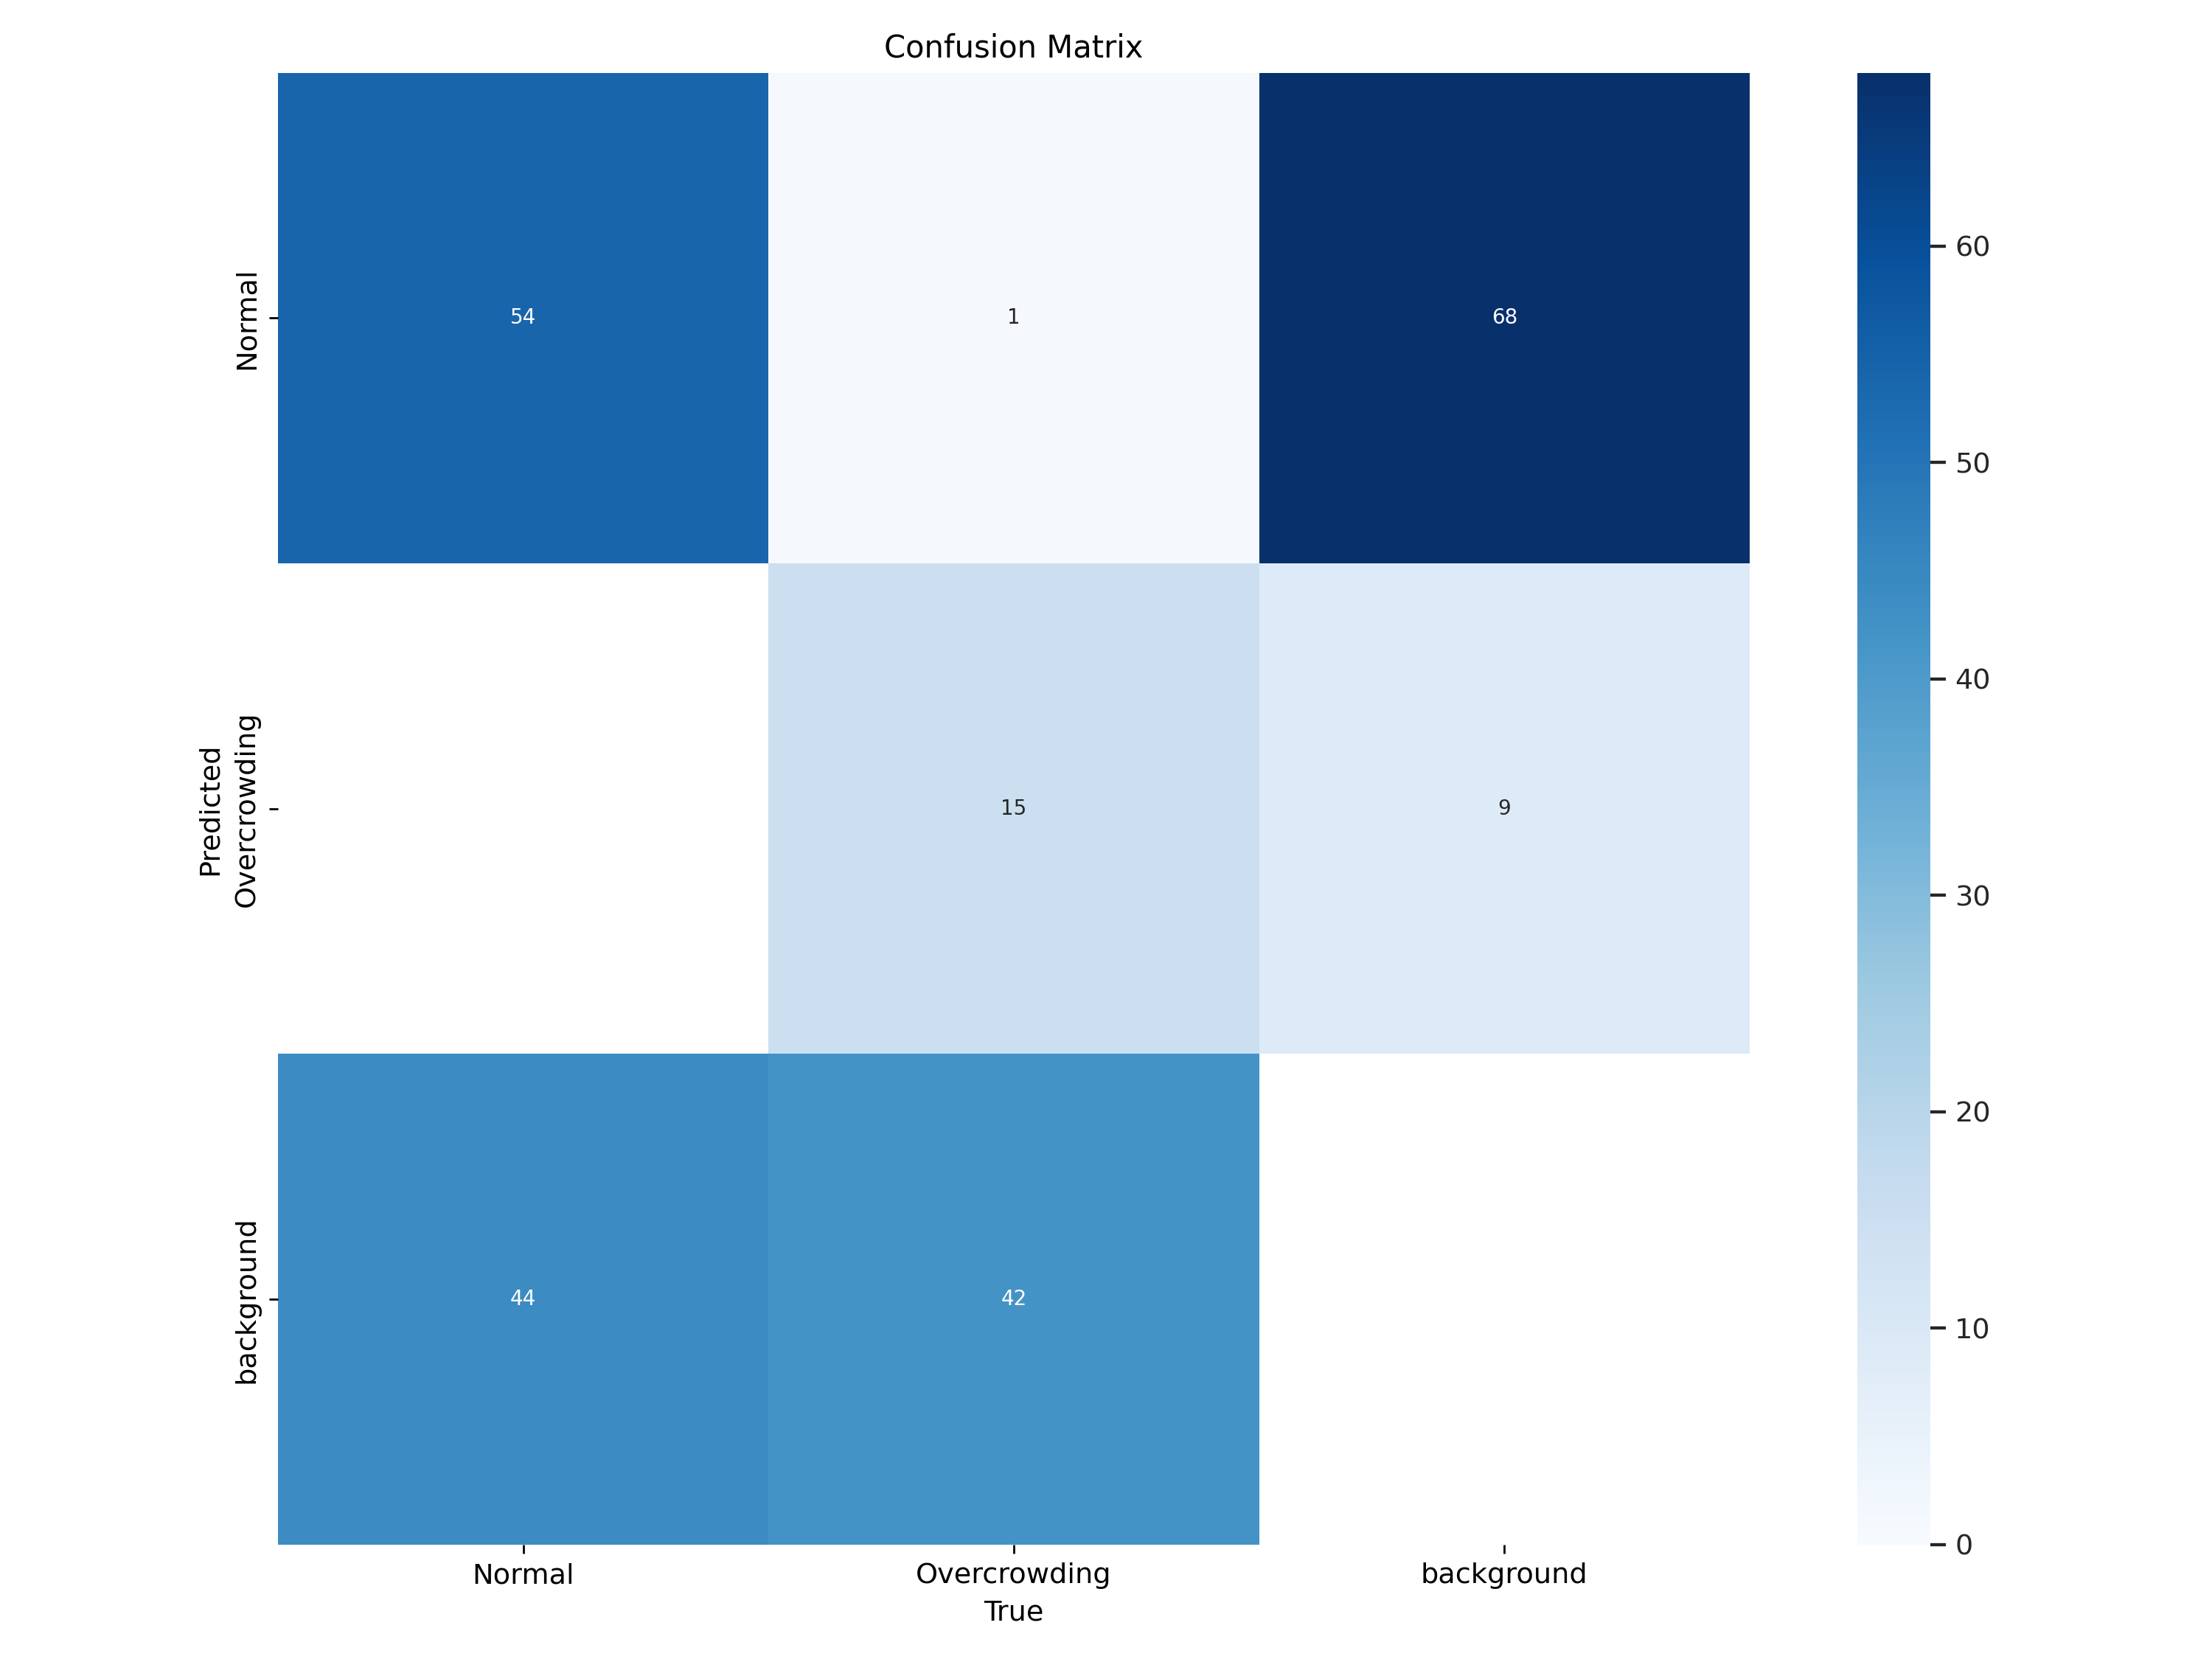

In [ ]:
Image(filename='/content/runs/detect/train5/confusion_matrix.png', width=600)

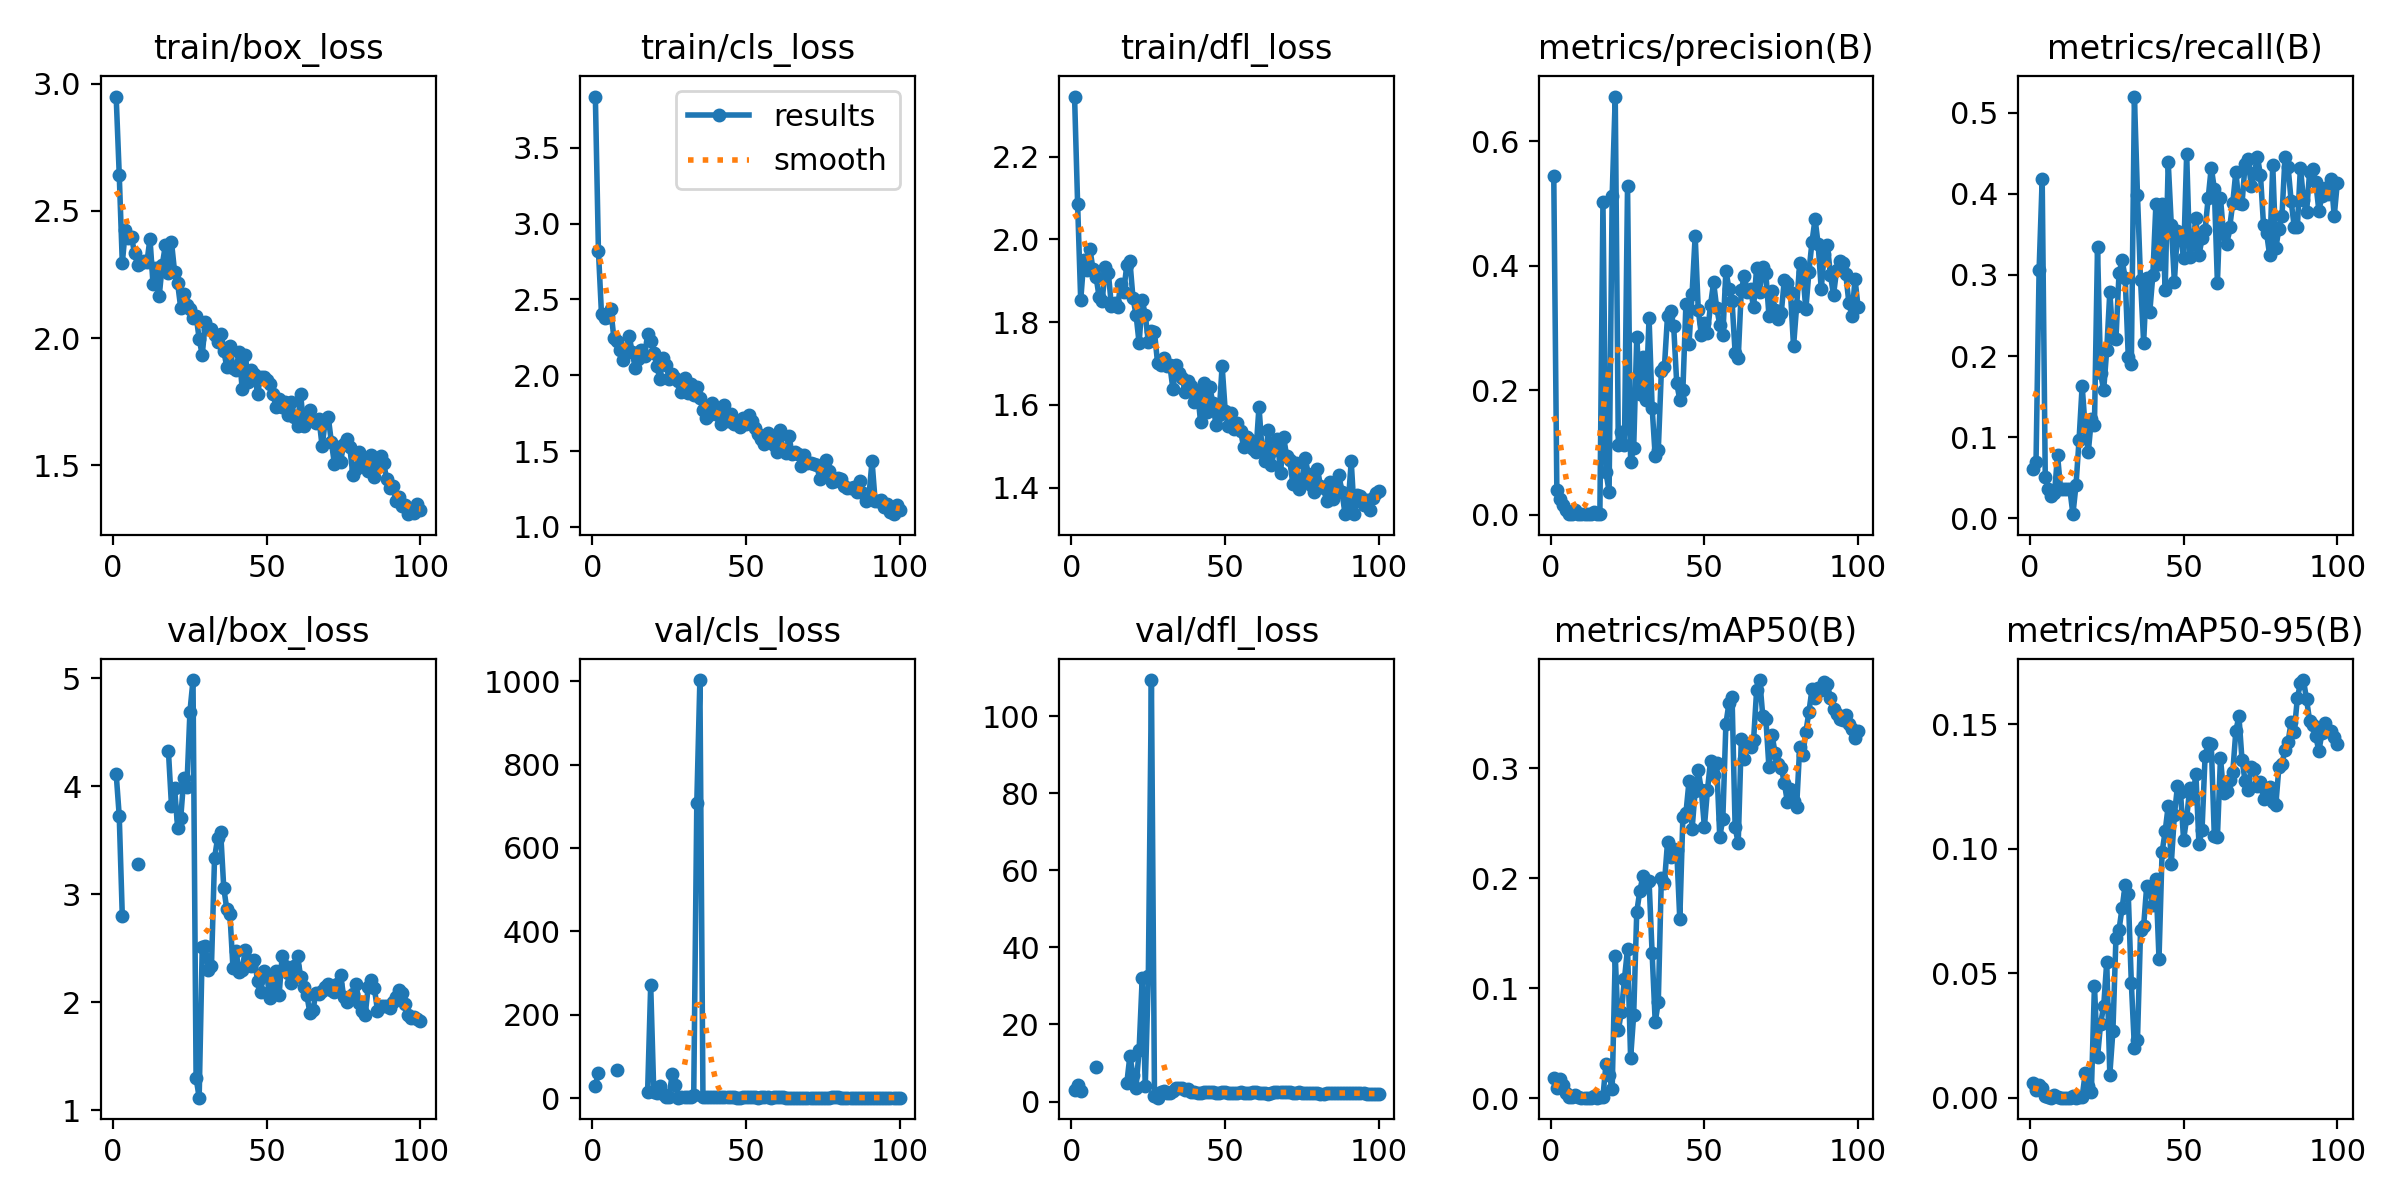

In [ ]:
Image(filename='/content/runs/detect/train5/results.png', width=600)

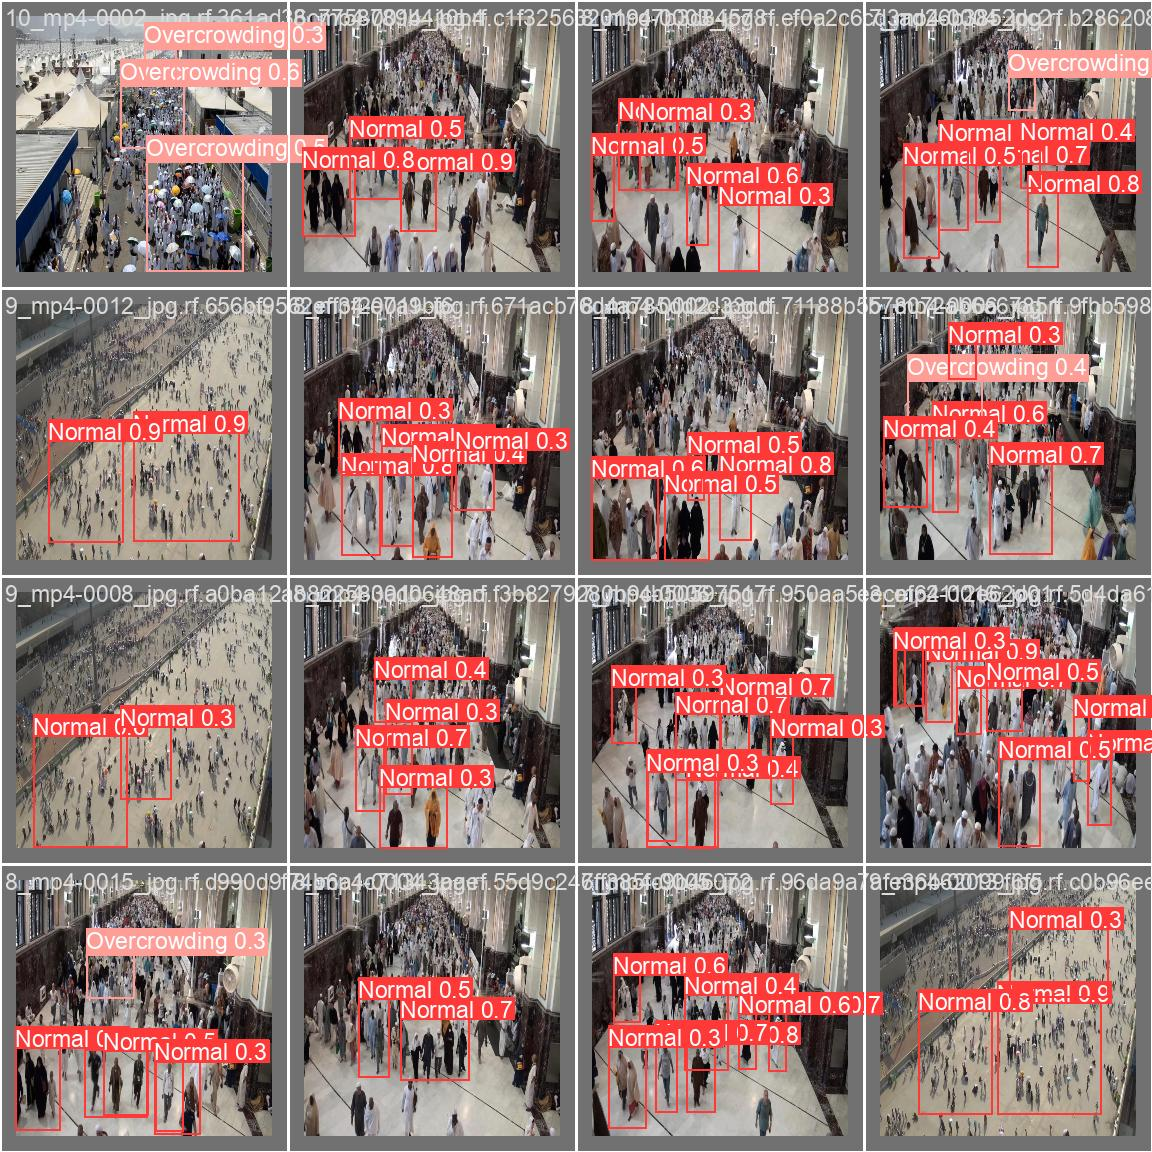

In [ ]:
Image(filename='/content/runs/detect/train5/val_batch0_pred.jpg', width=600)

In [ ]:
#Validatation trail 3
!yolo task=detect mode=val model='/content/runs/detect/train4/weights/best.pt' data='/content/Rasad/Hajj dataset yolo v8/data.yaml'

Ultralytics YOLOv8.1.15 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840918 parameters, 0 gradients, 78.7 GFLOPs
val: Scanning /content/Rasad/Hajj dataset yolo v8/valid/labels.cache... 33 images, 0 backgrounds, 0 corrupt: 100% 33/33 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 3/3 [00:03<00:00,  1.15s/it]
                   all         33        156      0.495      0.376      0.366       0.14
                Normal         33         98      0.469      0.459      0.441      0.197
          Overcrowding         33         58      0.521      0.293      0.292     0.0835
Speed: 1.4ms preprocess, 32.8ms inference, 0.0ms loss, 31.7ms postprocess per image
Results saved to runs/detect/val11
💡 Learn more at https://docs.ultralytics.com/modes/val


In [ ]:
#prediction trail 3
!yolo task=detect mode=predict model='/content/runs/detect/train5/weights/best.pt' conf=0.25 source='/content/Rasad/Hajj dataset yolo v8/test/images'

Ultralytics YOLOv8.1.15 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43608150 parameters, 0 gradients, 164.8 GFLOPs

image 1/16 /content/Rasad/Hajj dataset yolo v8/test/images/10_mp4-0000_jpg.rf.87226d98d10f7a76a2ea5b19b3575676.jpg: 256x256 2 Overcrowdings, 31.0ms
image 2/16 /content/Rasad/Hajj dataset yolo v8/test/images/10_mp4-0003_jpg.rf.647bdf9189a18854b078c02a51e3e764.jpg: 256x256 2 Overcrowdings, 18.7ms
image 3/16 /content/Rasad/Hajj dataset yolo v8/test/images/11_mp4-0011_jpg.rf.8c8ac0fc0309cdf67637f2f762a248bd.jpg: 256x256 3 Normals, 18.6ms
image 4/16 /content/Rasad/Hajj dataset yolo v8/test/images/11_mp4-0015_jpg.rf.689577e901ad8b400fca35914c1982ce.jpg: 256x256 2 Normals, 1 Overcrowding, 18.6ms
image 5/16 /content/Rasad/Hajj dataset yolo v8/test/images/12_mp4-0002_jpg.rf.abd812b6caed384b60e2ce3bb51b40ae.jpg: 256x256 4 Overcrowdings, 18.6ms
image 6/16 /content/Rasad/Hajj dataset yolo v8/test/images/12_mp4-0003_jpg.rf.d26529f2

In [ ]:
#


# save to drive to get folders + model import shutil from google.colab import drive

# Mount your Google Drivedrive.mount('/content/drive')

# Specify the path to the folder to save folder_path = '/content/drive/MyDrive/yolov8l'

# Specify the path to the destination folder in Google Drive destination_path = '/content/drive/MyDrive/yolov8l'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import pickle

iris = load_iris()
model = GaussianNB()

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1)
model_f = model.fit(X_train, y_train)

print("Model score: ", model.score(X_train, y_train))
print("Test Accuracy: ", model.score(X_test, y_test))

pickle.dump(model_f, open("model_gb.pkl", "wb"))

Model score:  0.9629629629629629
Test Accuracy:  0.9333333333333333


#**Evaluating Models**

*best Nano model suumary*

In [ ]:
print(type('/content/runs/detect/train5/weights/best.pt'))


<class 'str'>


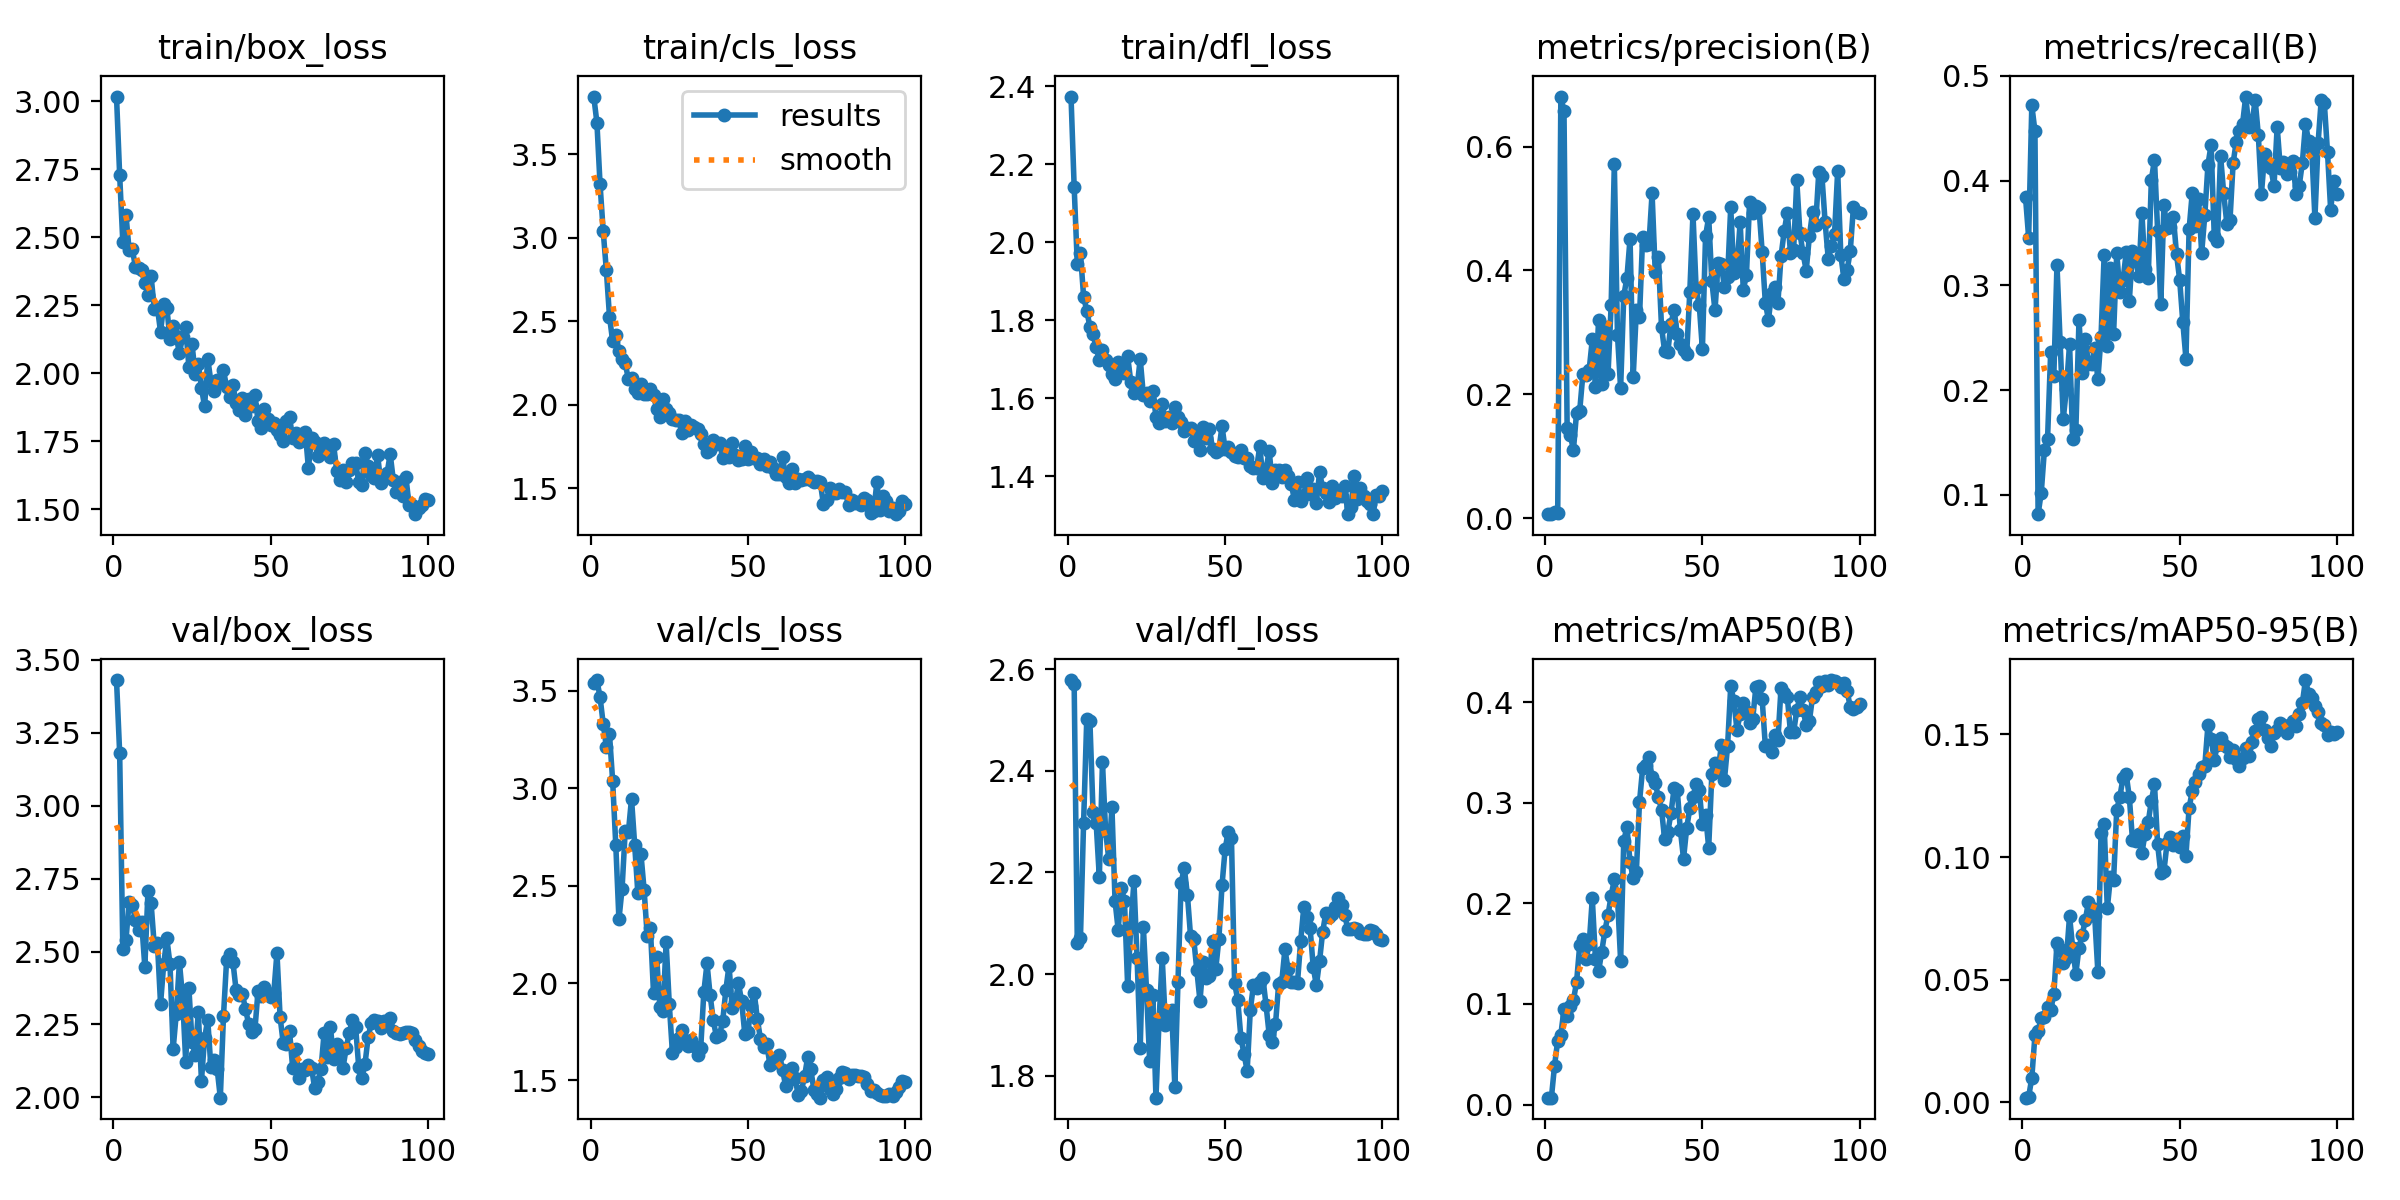

In [ ]:
# print result
Image(filename='/content/runs/detect/train3/results.png' ,width=600)


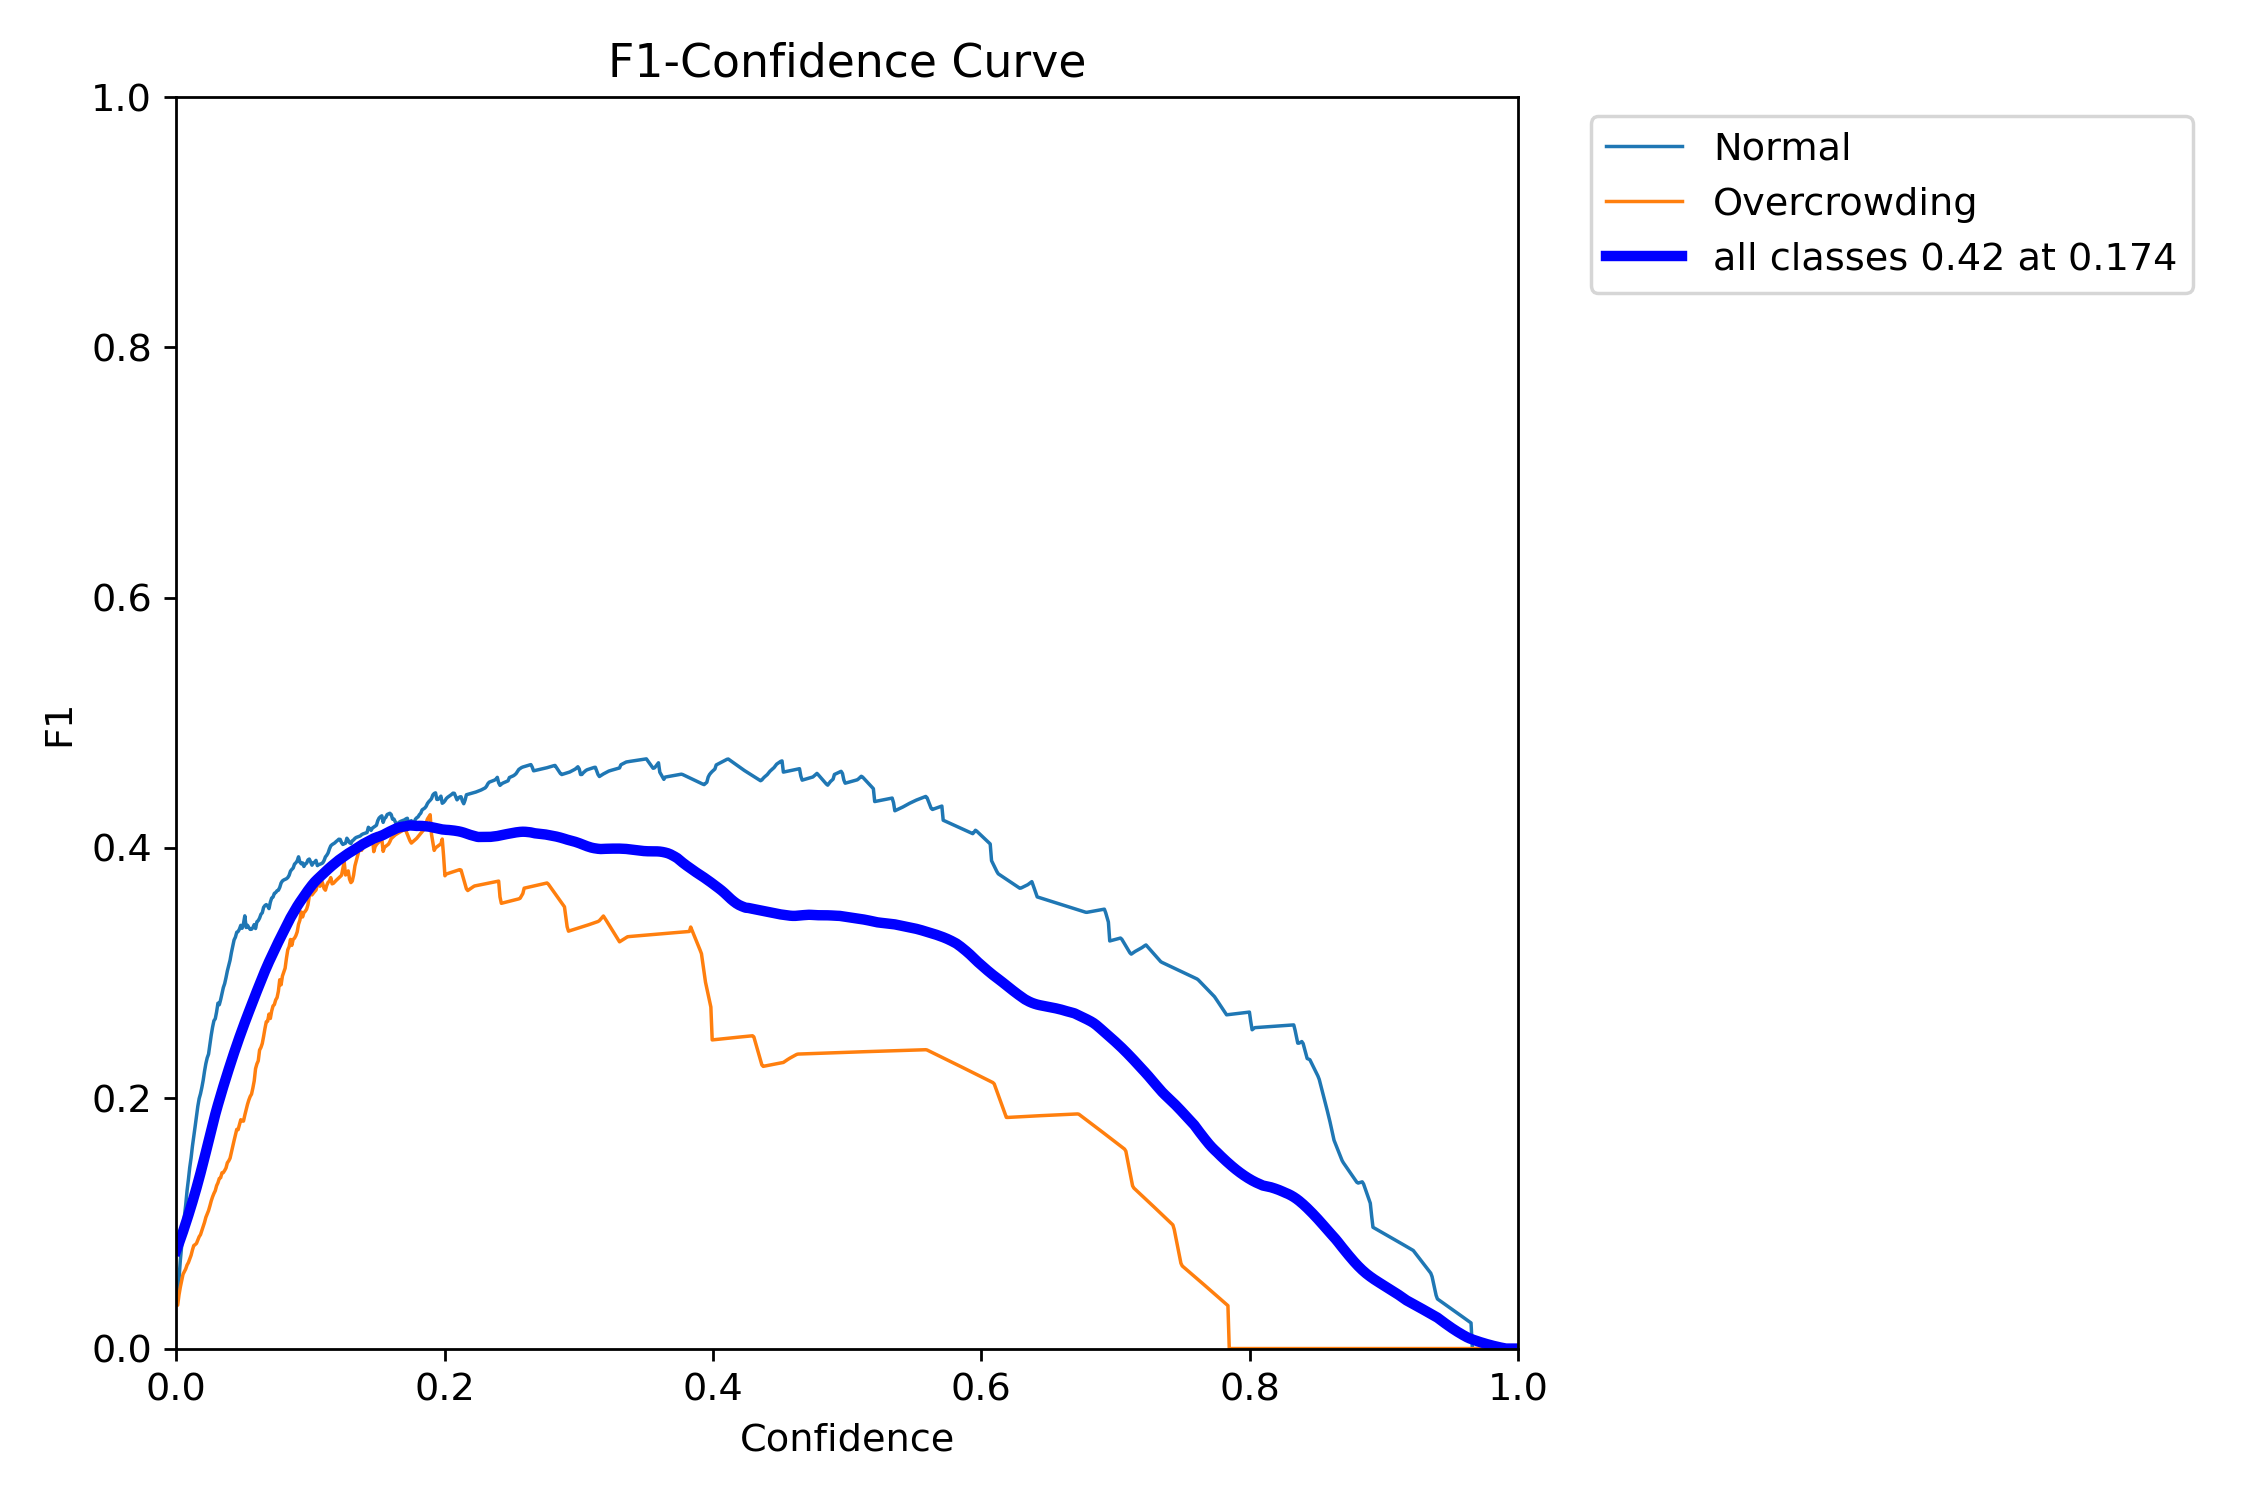

In [ ]:
# print F1_curve png
Image(filename='/content/runs/detect/train3/F1_curve.png' ,width=600)


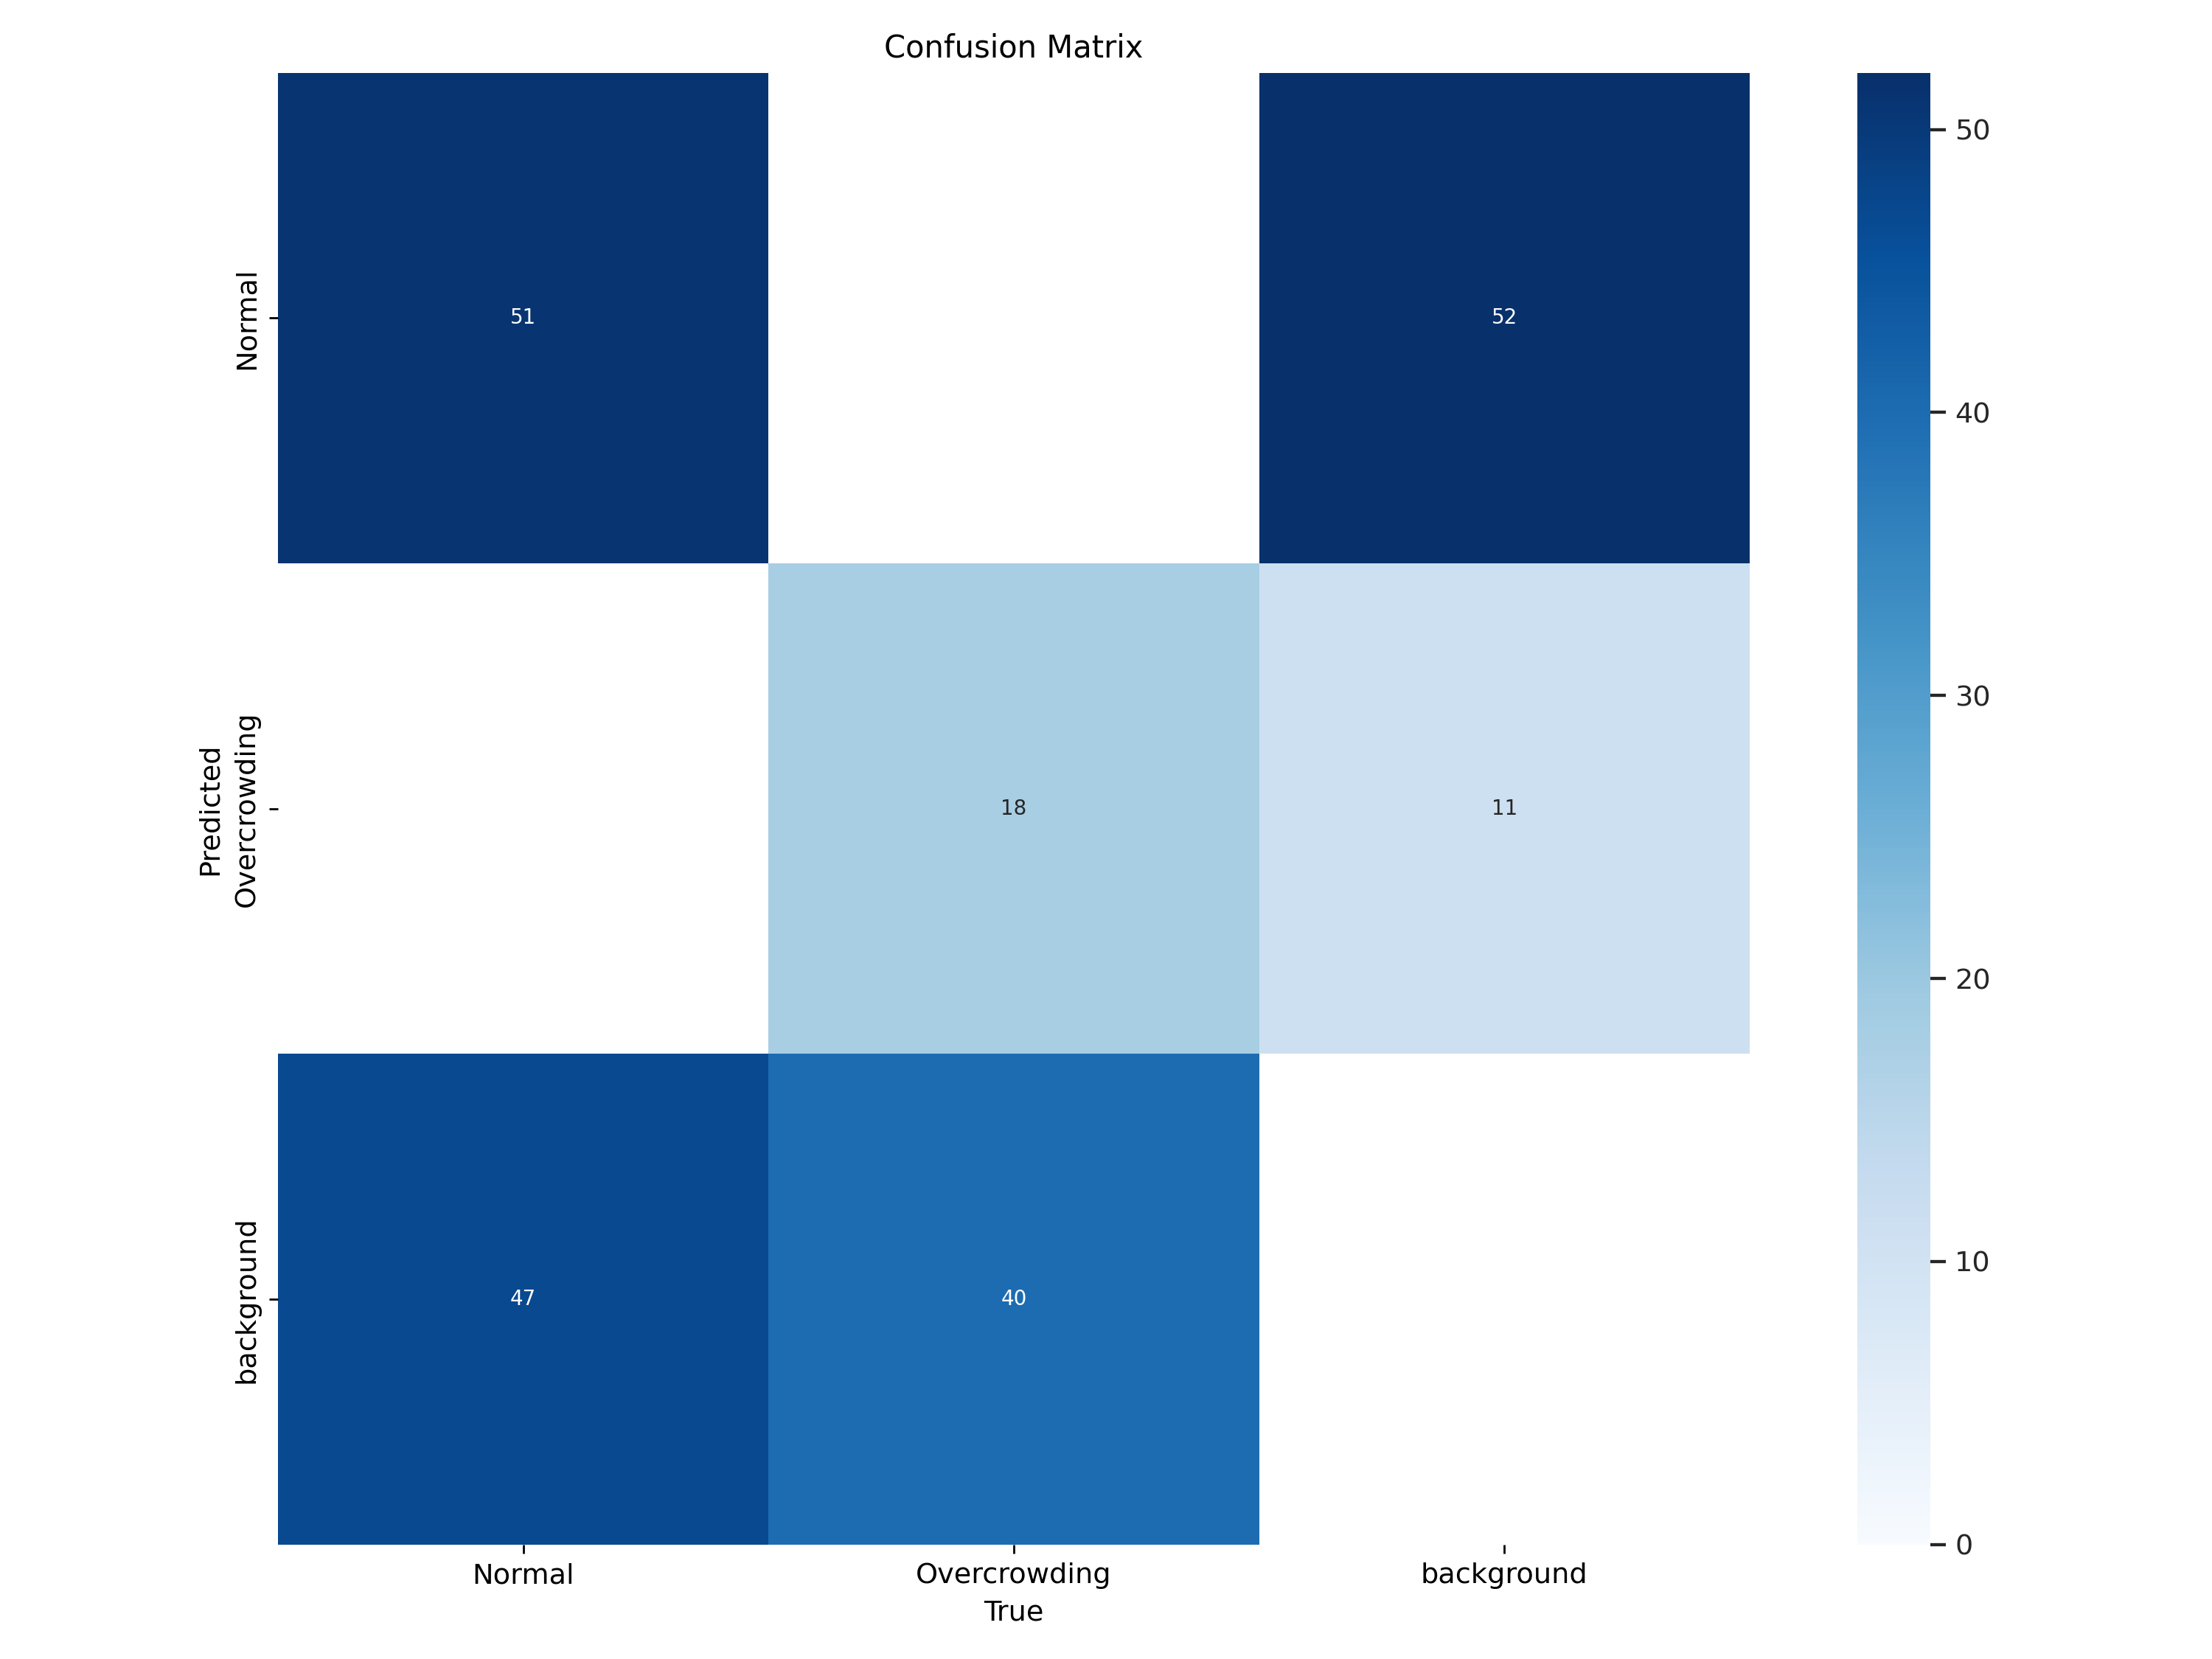

In [ ]:
# print confusion_matrix.pn
Image(filename='/content/runs/detect/train3/confusion_matrix.png' ,width=600)


*best medium model8*

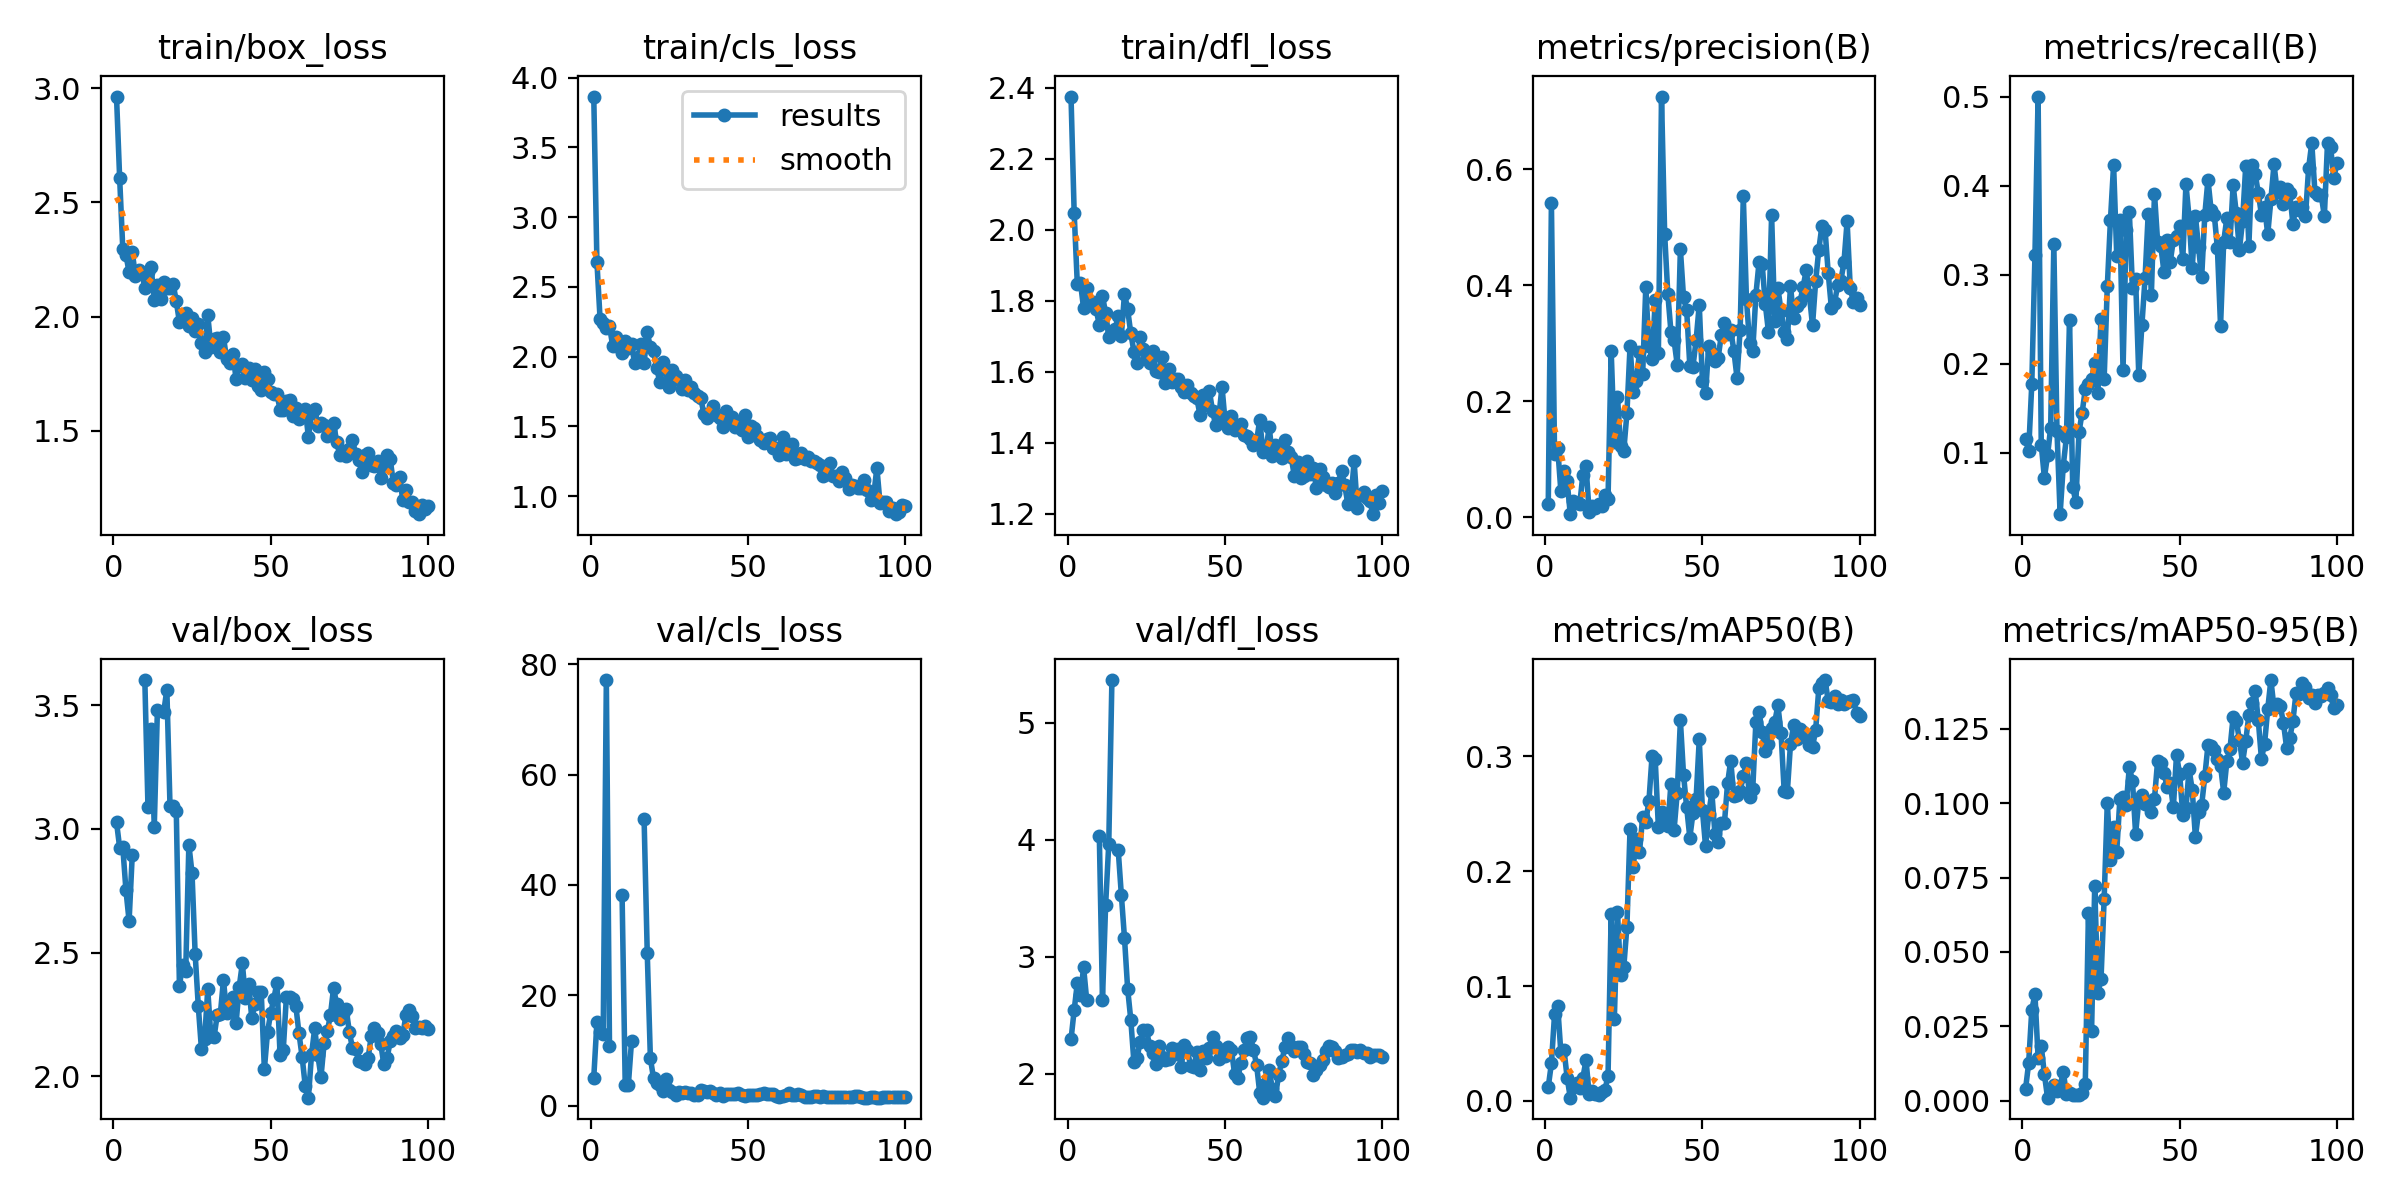

In [ ]:
# print result
Image(filename='/content/runs/detect/train4/results.png' ,width=600)


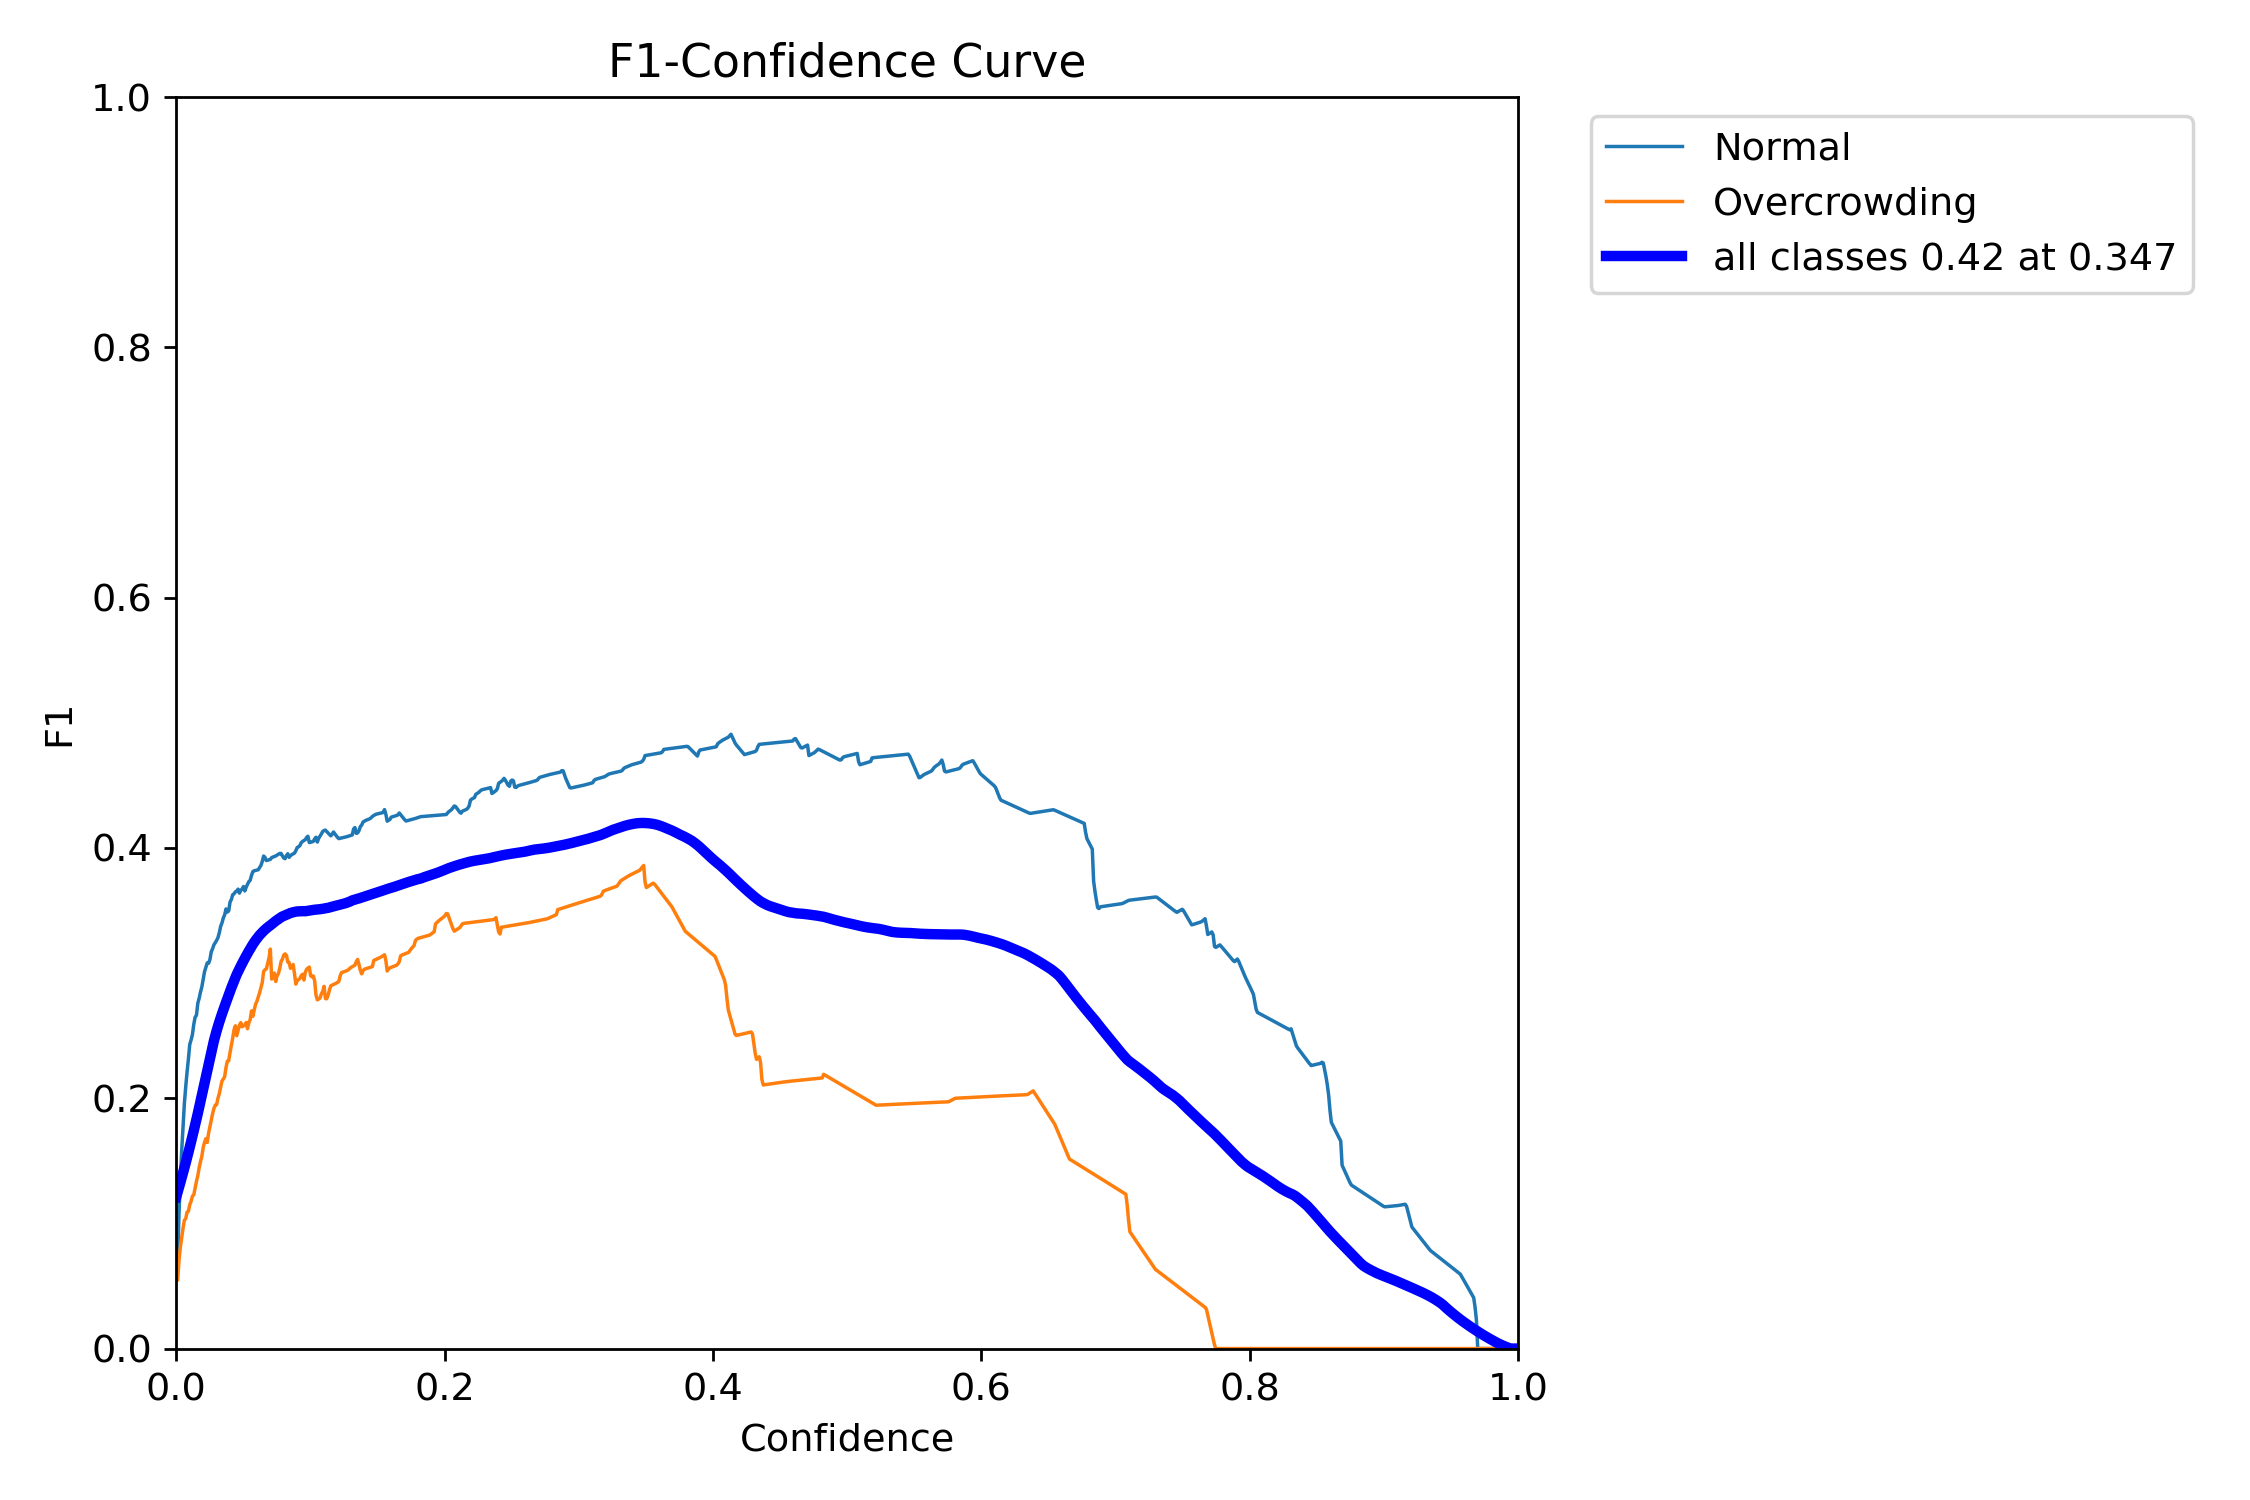

In [ ]:
# print F1_curve png
Image(filename='/content/runs/detect/train4/F1_curve.png' ,width=600)



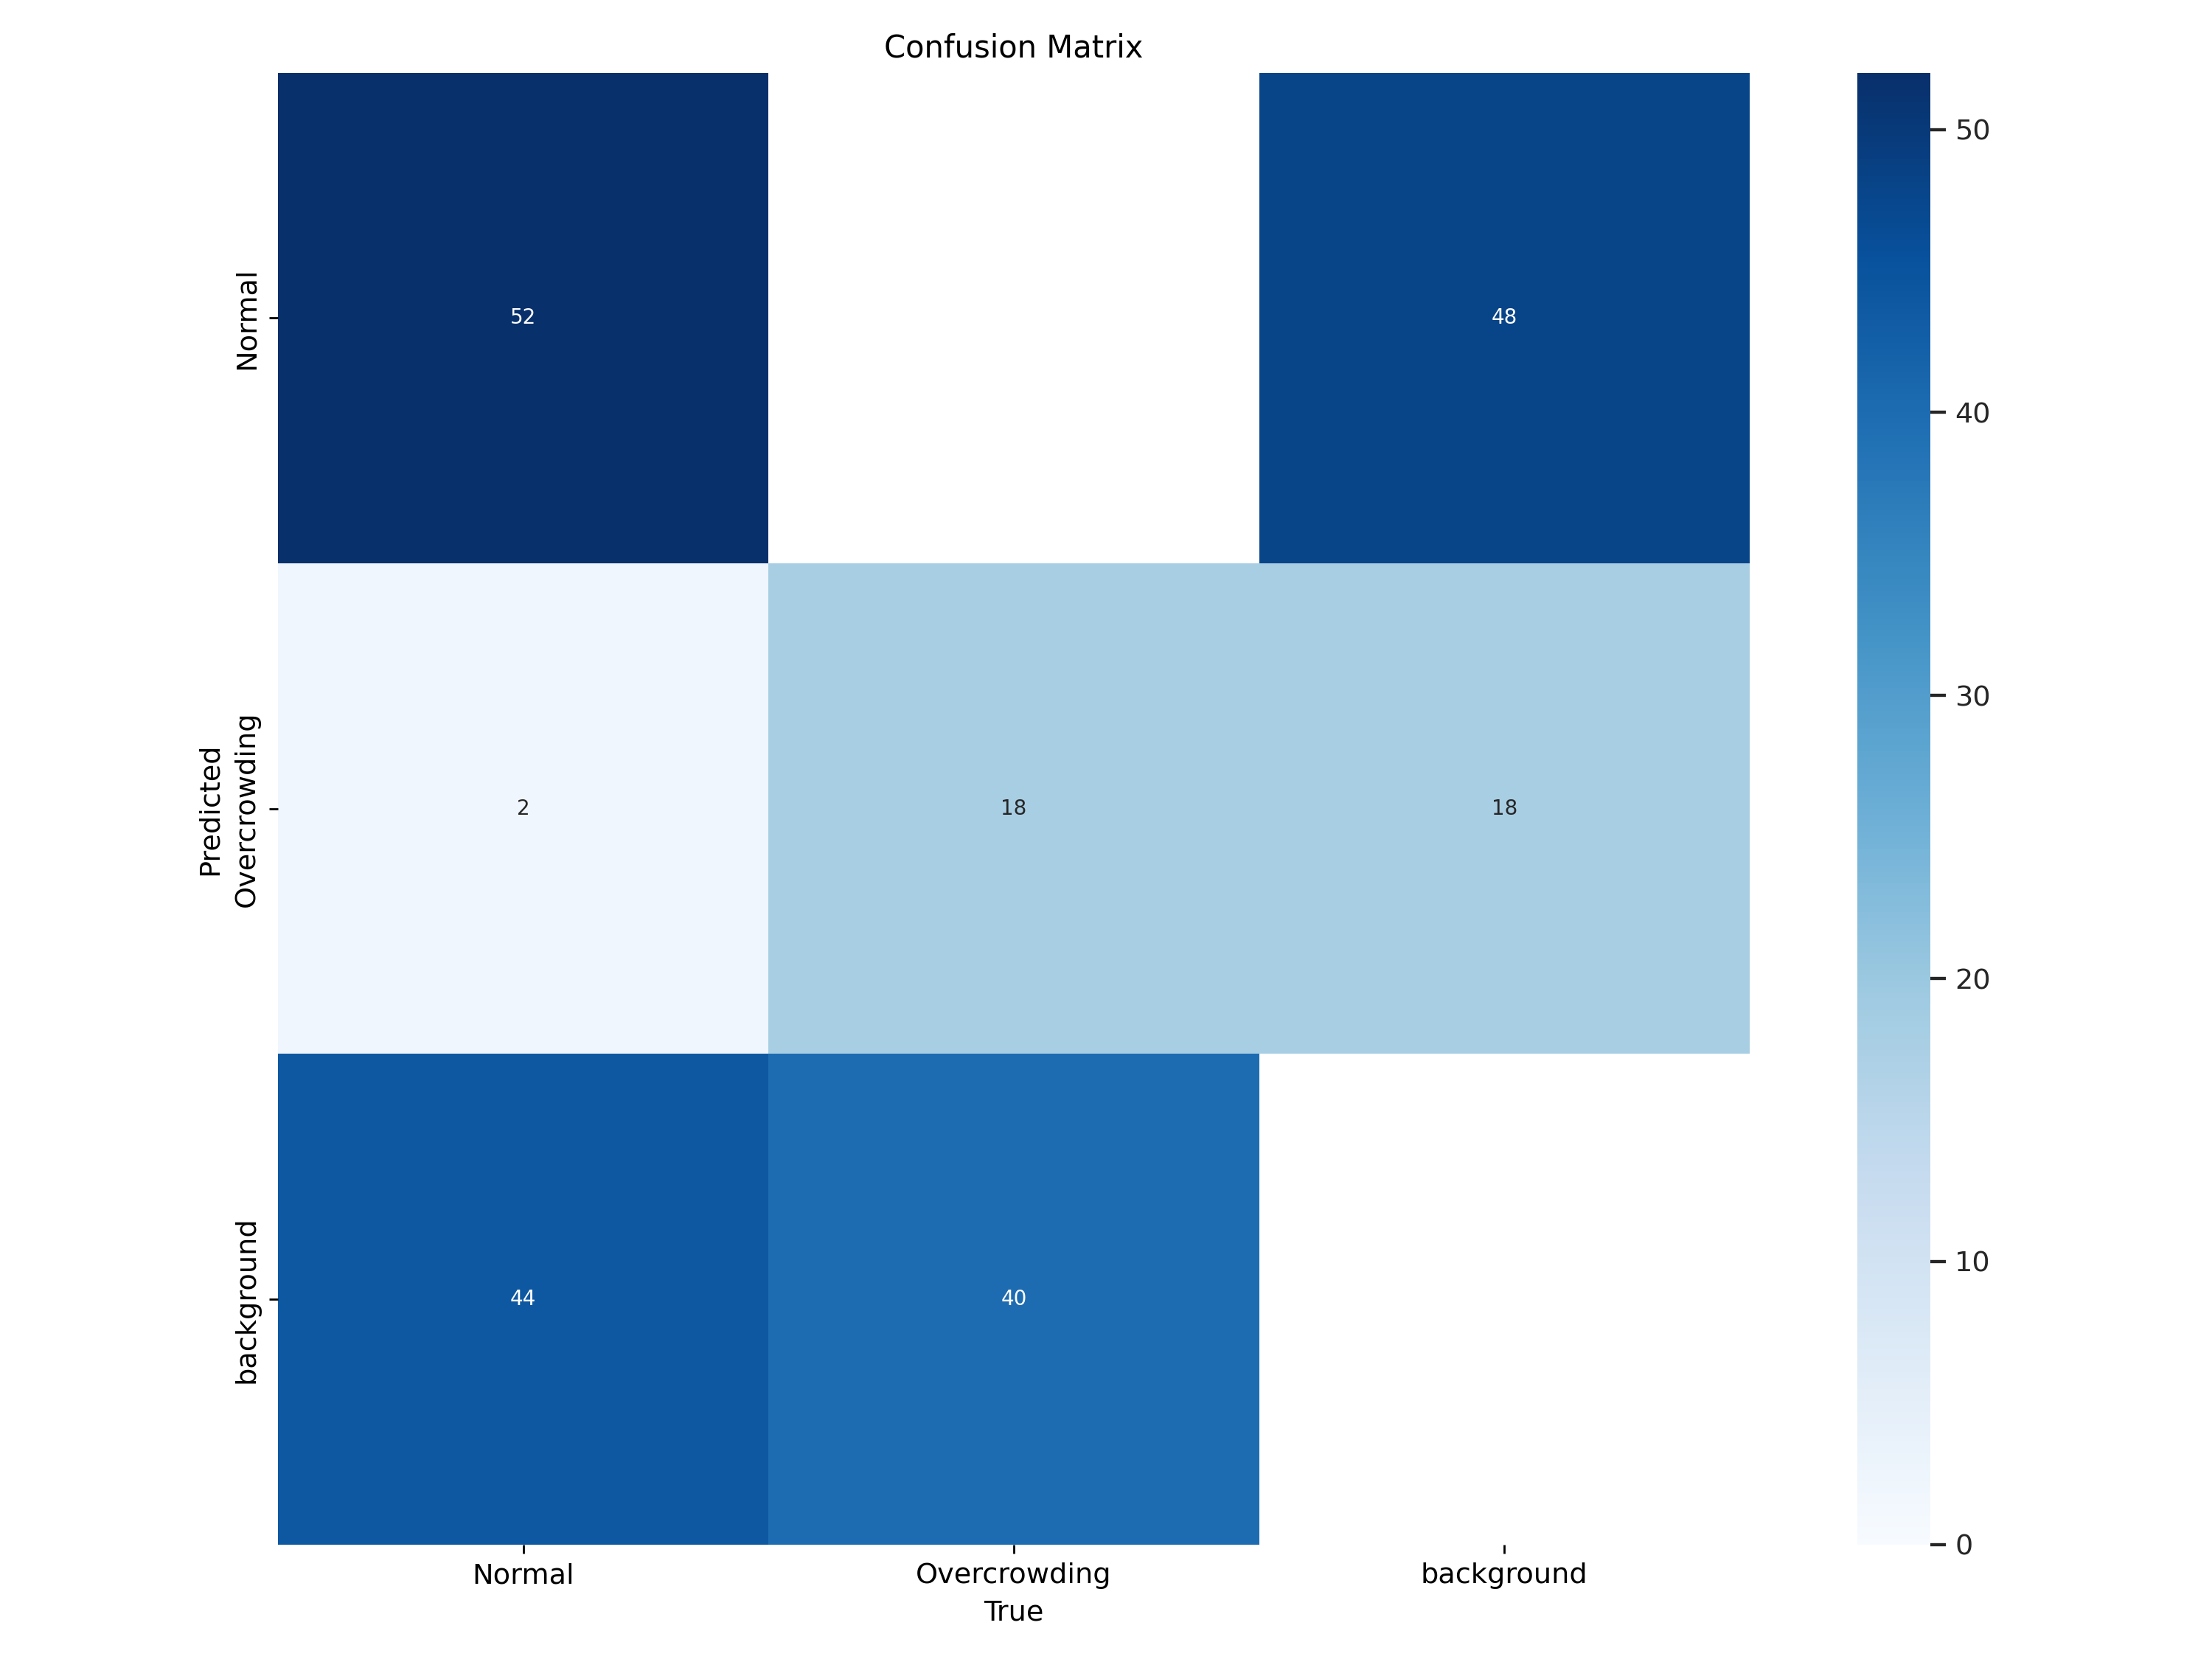

In [ ]:
# print confusion_matrix.pn
Image(filename='/content/runs/detect/train4/confusion_matrix.png' ,width=600)



*Best large model summary*

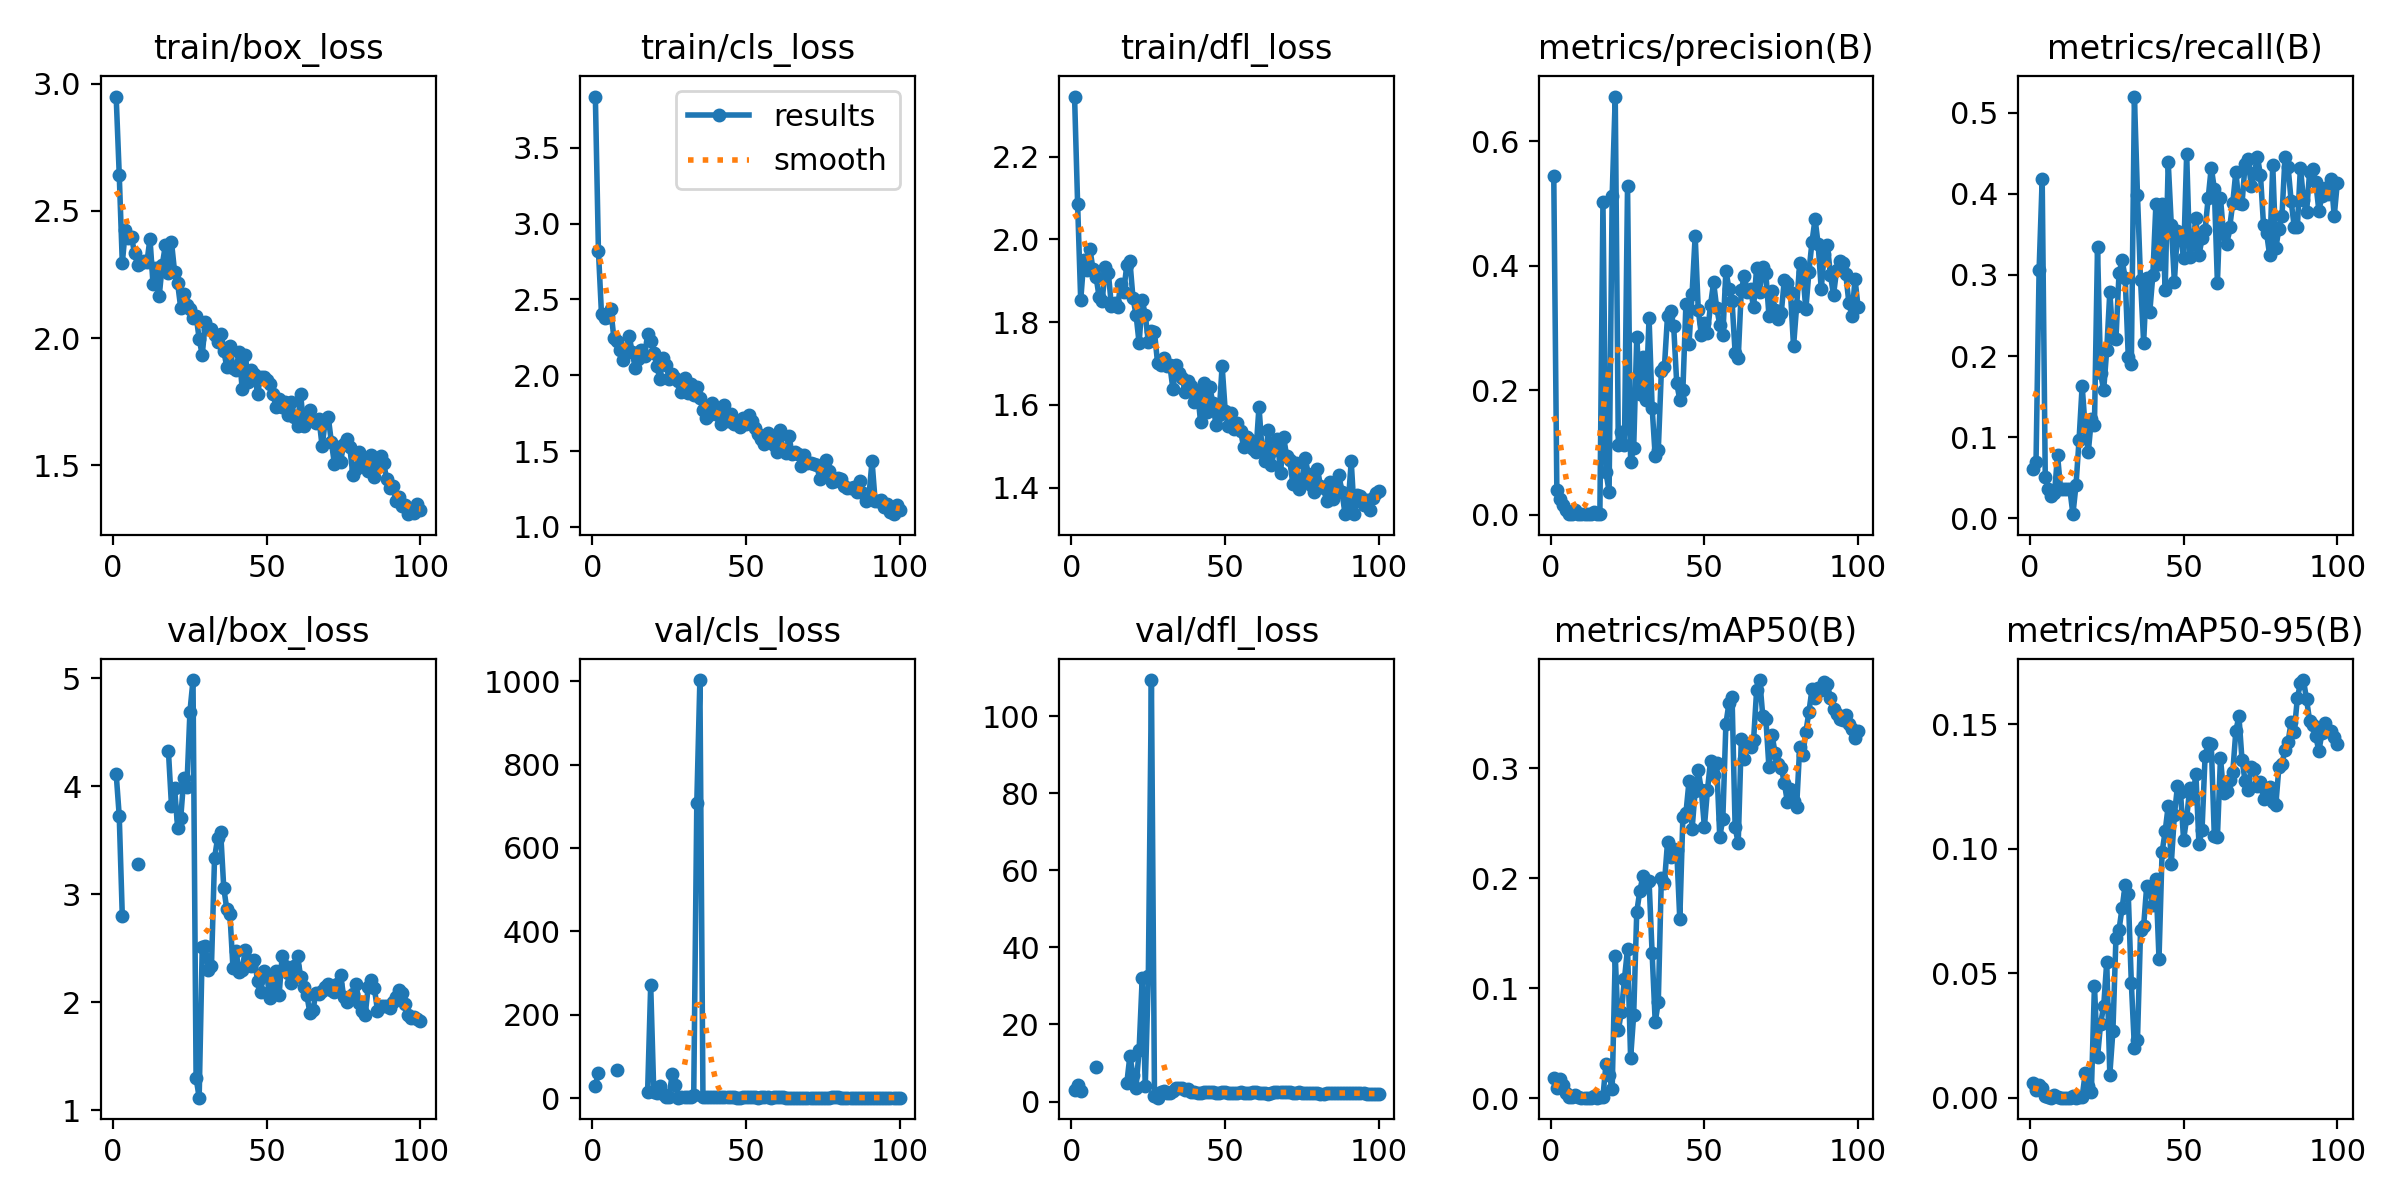

In [ ]:
#print result
Image(filename='/content/runs/detect/train5/results.png' ,width=600)


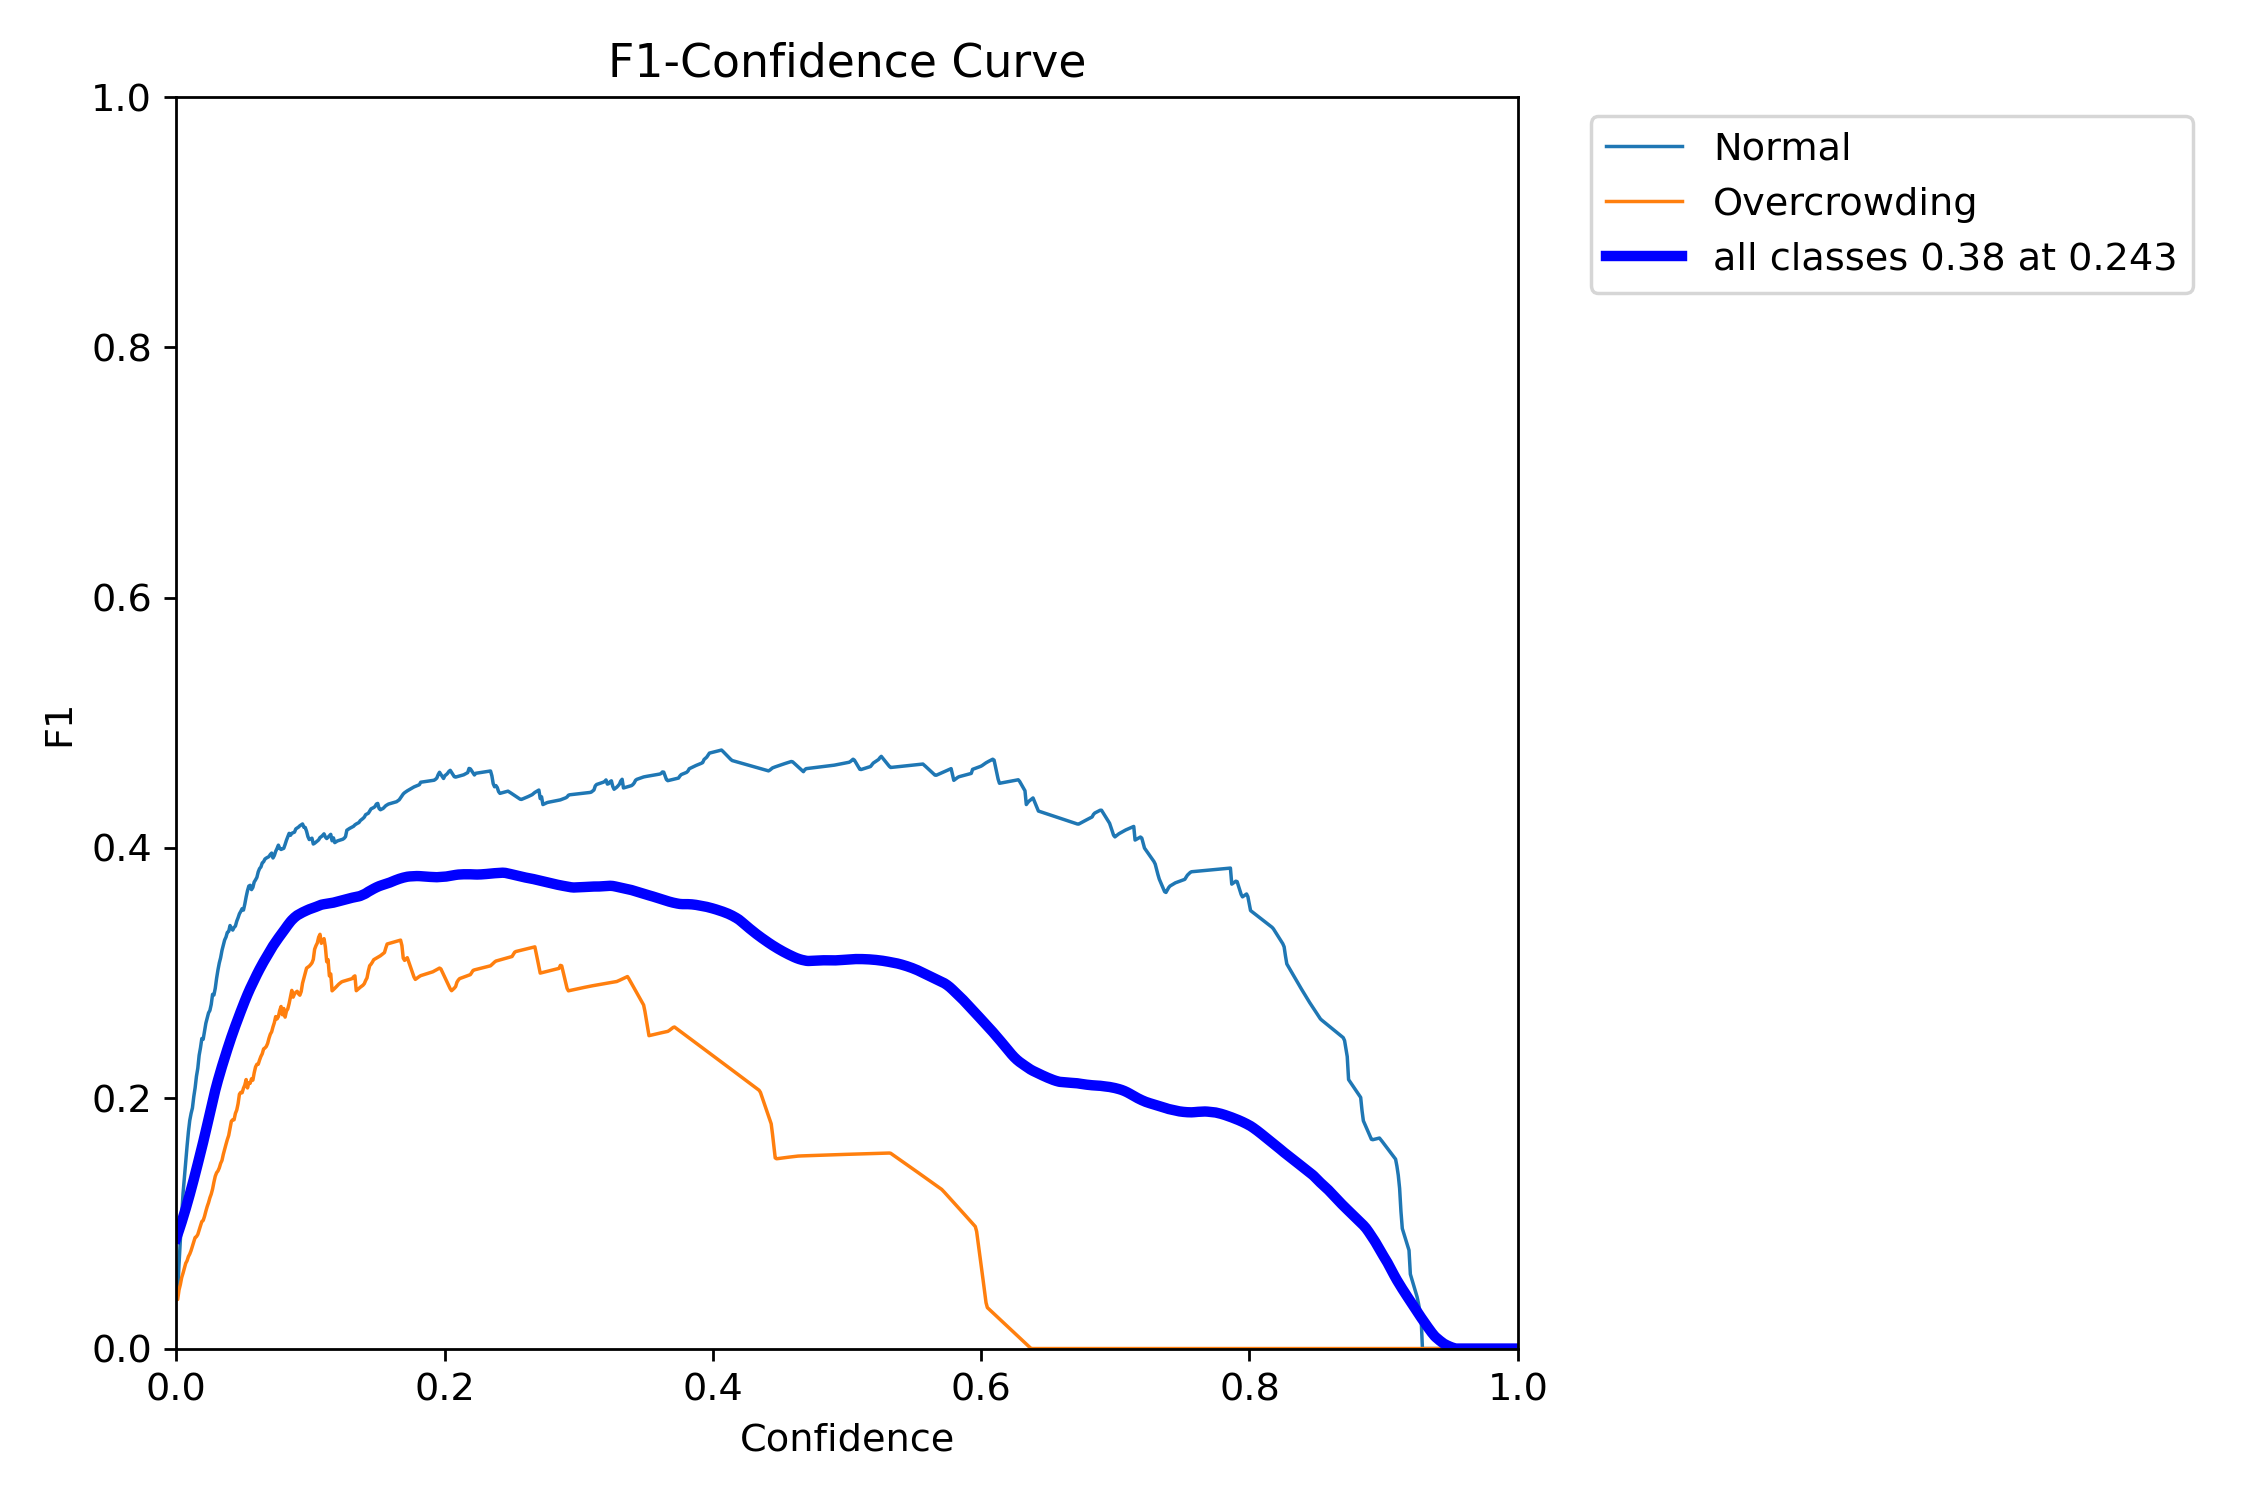

In [ ]:
#  print F1_curve png
Image(filename='/content/runs/detect/train5/F1_curve.png' ,width=600)


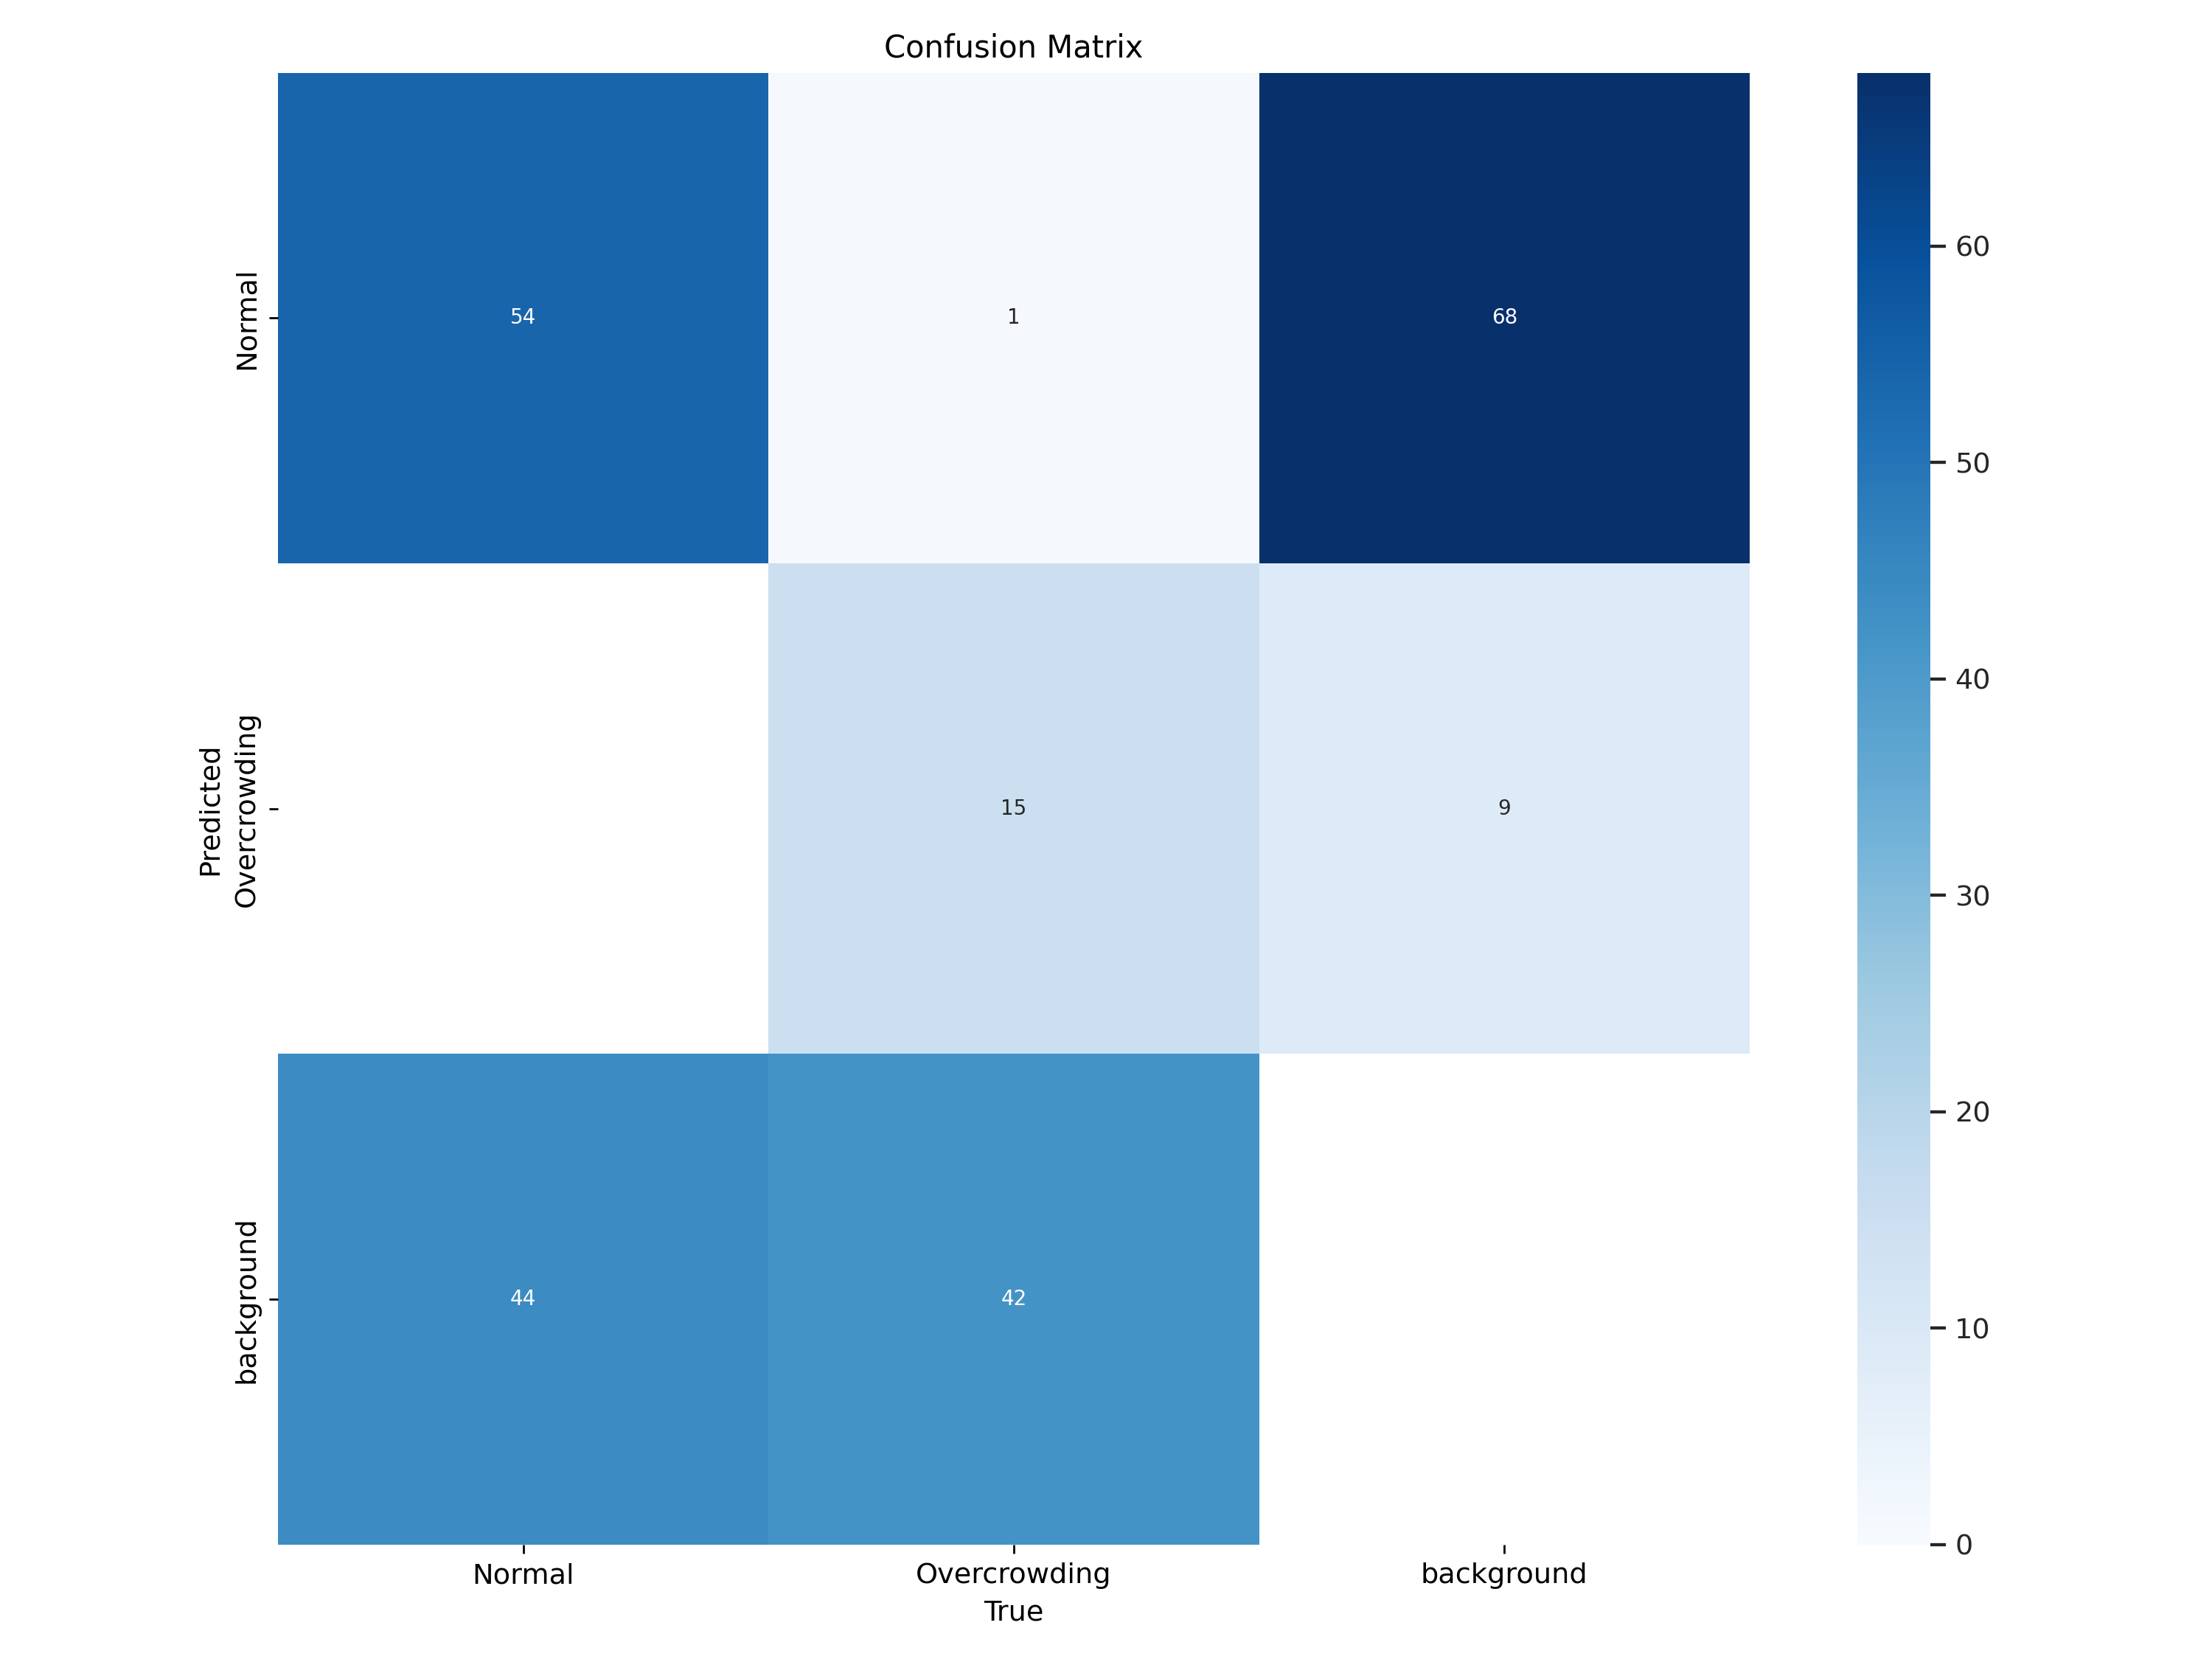

In [ ]:
# print confusion_matrix.pn
Image(filename='/content/runs/detect/train5/confusion_matrix.png' ,width=600)


### Save the results

In [ ]:
# save to drive to get folders + model
import shutil
from google.colab import drive

# Mount your Google Drive
drive.mount('/content/drive',force_remount=True)

# Specify the path to the folder to save
folder_path = '/content/runs'

# Specify the path to the destination folder in Google Drive
destination_path = '/content/drive/MyDrive/Colab Notebooks/yolo v8 results'

# Copy the entire folder to your Google Drive
#shutil.copytree(folder_path, destination_path)

Mounted at /content/drive


#**Deploy Best Model to ONNX format**

*EXPORT*

In [ ]:
from ultralytics.models.yolo.model import yolo

# Load model
#model = yolo('/content/runs/detect/train3/weights/best.pt')

# Export the model
model.export(format='onnx')

AttributeError: ignored

In [ ]:
#

# save to drive to get folders + model
import shutil
from google.colab import drive

# Mount your Google Drive
drive.mount('/content/drive')

# Specify the path to the folder to save
folder_path = '/content/pave-the-way-Capstone-Project/yolov8n'

# Specify the path to the destination folder in Google Drive
destination_path = '/content/drive/MyDrive/yolov8n'

# Copy the entire folder to your Google Drive
shutil.copytree(folder_path, destination_path)